# Avance 1: Análsis EDA (Exploración de datos)

# Equipo 21
## Integrantes:
1. José Arturo Valdivia Rivera - A01795395
2. Abraham Esses Cohen - A01018853
3. Diego Audiffred Mayoral - A01732823


In [ ]:
# Carga de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
# Lectura de datos
path = 'C:/Users/esses/Downloads/BD_consolidada.csv'
data = pd.read_csv(path)

## Análisis de dataframe

In [ ]:
data.head(10)

id     codigo  empresa  \
0   2017eneroSANTA CRUZRestoGaseosas330NO RETORNABLE  2017enero  Nielsen   
1      2017eneroSANTA CRUZRestoGaseosas620RETORNABLE  2017enero  Nielsen   
2  2017eneroSANTA CRUZRestoGaseosas1000NO RETORNABLE  2017enero  Nielsen   
3  2017eneroSANTA CRUZRestoGaseosas2000NO RETORNABLE  2017enero  Nielsen   
4  2017eneroSANTA CRUZRestoGaseosas3000NO RETORNABLE  2017enero  Nielsen   
5  2017eneroSANTA CRUZRestoGaseosas3100NO RETORNABLE  2017enero  Nielsen   
6  2017eneroSANTA CRUZRestoAgua Plana600NO RETORN...  2017enero  Nielsen   
7  2017eneroSANTA CRUZRestoAgua Plana1000NO RETOR...  2017enero  Nielsen   
8  2017eneroSANTA CRUZRestoAgua Plana2000NO RETOR...  2017enero  Nielsen   
9  2017eneroSANTA CRUZRestoAgua Plana2200NO RETOR...  2017enero  Nielsen   

       mercado  anio    mes   operacion fab_nartd categoria_embol  tamanio  \
0  Tradicional  2017  enero  SANTA CRUZ     Resto        Gaseosas      330   
1  Tradicional  2017  enero  SANTA CRUZ     Resto        Gaseosas      620   
2  Tradicional  2017  enero  SANTA CRUZ     Resto        Gaseosas     1000   
3  Tradicional  2017  enero  SANTA CRUZ     Resto        Gaseosas     2000   
4  Tradicional  2017  enero  SANTA CRUZ     Resto        Gaseosas     3000   
5  Tradicional  2017  enero  SANTA CRUZ     Resto        Gaseosas     3100   
6  Tradicional  2017  enero  SANTA CRUZ     Resto      Agua Plana      600   
7  Tradicional  2017  enero  SANTA CRUZ     Resto      Agua Plana     1000   
8  Tradicional  2017  enero  SANTA CRUZ     Resto      Agua Plana     2000   
9  Tradicional  2017  enero  SANTA CRUZ     Resto      Agua Plana     2200   

   ... inflacion localidad caja_unitaria  cajas_fisicas  botellas  \
0  ...       NaN         0           0.0            0.0         0   
1  ...       NaN         0           0.0            0.0         0   
2  ...       NaN         0           0.0            0.0         0   
3  ...       NaN         0           0.0            0.0         0   
4  ...       NaN         0           0.0            0.0         0   
5  ...       NaN         0           0.0            0.0         0   
6  ...       NaN         0           0.0            0.0         0   
7  ...       NaN         0           0.0            0.0         0   
8  ...       NaN         0           0.0            0.0         0   
9  ...       NaN         0           0.0            0.0         0   

   ingreso_bruto  ingreso_facturado  ingreso_neto  descuento_calculado  \
0            0.0                0.0           0.0                  0.0   
1            0.0                0.0           0.0                  0.0   
2            0.0                0.0           0.0                  0.0   
3            0.0                0.0           0.0                  0.0   
4            0.0                0.0           0.0                  0.0   
5            0.0                0.0           0.0                  0.0   
6            0.0                0.0           0.0                  0.0   
7            0.0                0.0           0.0                  0.0   
8            0.0                0.0           0.0                  0.0   
9            0.0                0.0           0.0                  0.0   

   precio_embol  
0             0  
1             0  
2             0  
3             0  
4             0  
5             0  
6             0  
7          -     
8          -     
9          -     

[10 rows x 42 columns]

In [ ]:
df = data.copy()  # Crear una copia del DataFrame original

In [ ]:
df.drop(columns=['id','codigo'], inplace=True)

In [ ]:
# Dimensiones del dataframe
print("Dimensiones (filas, columnas):", df.shape)

Dimensiones (filas, columnas): (63527, 40)


In [ ]:
# Tipos de datos
print("\nTipos de datos por columna:")
print(df.dtypes)


Tipos de datos por columna:
empresa                                                     object
mercado                                                     object
anio                                                         int64
mes                                                         object
operacion                                                   object
fab_nartd                                                   object
categoria_embol                                             object
tamanio                                                      int64
retornabilidad                                              object
venta                                                       object
venta_pcs                                                   object
indice_general                                             float64
agricultura,_pecuario,_silvicultura,_caza_y_pesca          float64
petroleo_crudo_y_gas_natural                               float64
minerales_metálicos_y_no_metálico

In [ ]:
# Columnas categoricas
object_cols = df.select_dtypes(include='object').columns.tolist()
object_cols

['empresa',
 'mercado',
 'mes',
 'operacion',
 'fab_nartd',
 'categoria_embol',
 'retornabilidad',
 'venta',
 'venta_pcs',
 'localidad',
 'precio_embol']

In [ ]:
# Columnas numéricas
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
numeric_cols

['anio',
 'tamanio',
 'indice_general',
 'agricultura,_pecuario,_silvicultura,_caza_y_pesca',
 'petroleo_crudo_y_gas_natural',
 'minerales_metálicos_y_no_metálicos',
 'industria_manufacturera',
 'alimentos,_bebidas_y_tabaco',
 'otras_industrias',
 'electricidad,_gas_y_agua',
 'construccion',
 'comercio',
 'transporte_y_almacenamiento',
 'comunicaciones',
 'establecimientos_financieros,_seguros,_bienes_inmuebles',
 'servicios_financieros',
 'servicios_a_las_empresas',
 'propiedad_de_vivienda',
 'servicios_de_la_administración_pública',
 'otros_servicios',
 'servicios_bancarios_imputados',
 'inflacion',
 'caja_unitaria',
 'cajas_fisicas',
 'botellas',
 'ingreso_bruto',
 'ingreso_facturado',
 'ingreso_neto',
 'descuento_calculado']

In [ ]:
# Estadísticas descriptivas de las columnas numéricas
df[numeric_cols].describe().T

count          mean  \
anio                                                63527.0   2020.996427   
tamanio                                             63527.0   1314.351740   
indice_general                                      58194.0    315.427217   
agricultura,_pecuario,_silvicultura,_caza_y_pesca   58194.0    276.208008   
petroleo_crudo_y_gas_natural                        58194.0    314.742931   
minerales_metálicos_y_no_metálicos                  58194.0    240.031034   
industria_manufacturera                             58194.0    304.545972   
alimentos,_bebidas_y_tabaco                         58194.0    365.631129   
otras_industrias                                    58194.0    253.764929   
electricidad,_gas_y_agua                            58194.0    442.454137   
construccion                                        58194.0    409.944071   
comercio                                            58194.0    284.962509   
transporte_y_almacenamiento                         58194.0    338.396242   
comunicaciones                                      58194.0    639.876001   
establecimientos_financieros,_seguros,_bienes_i...  58194.0    402.577092   
servicios_financieros                               58194.0   1095.372781   
servicios_a_las_empresas                            58194.0    385.629365   
propiedad_de_vivienda                               58194.0    211.271017   
servicios_de_la_administración_pública              58194.0    337.039048   
otros_servicios                                     58194.0    245.449775   
servicios_bancarios_imputados                       58194.0   1025.684268   
inflacion                                           56727.0      3.332896   
caja_unitaria                                       63527.0   3133.626749   
cajas_fisicas                                       63527.0   1566.738068   
botellas                                            63527.0  11039.077495   
ingreso_bruto                                       63527.0  65818.121861   
ingreso_facturado                                   63527.0  70903.556893   
ingreso_neto                                        63527.0  63805.376612   
descuento_calculado                                 63527.0   2012.745249   

                                                              std  \
anio                                                     2.527512   
tamanio                                               1302.245152   
indice_general                                          25.806117   
agricultura,_pecuario,_silvicultura,_caza_y_pesca       79.275942   
petroleo_crudo_y_gas_natural                            63.769193   
minerales_metálicos_y_no_metálicos                      36.217410   
industria_manufacturera                                 34.597525   
alimentos,_bebidas_y_tabaco                             37.130874   
otras_industrias                                        38.844033   
electricidad,_gas_y_agua                                81.166585   
construccion                                           180.807691   
comercio                                                36.469287   
transporte_y_almacenamiento                             50.420359   
comunicaciones                                          98.004150   
establecimientos_financieros,_seguros,_bienes_i...      36.134802   
servicios_financieros                                  152.215023   
servicios_a_las_empresas                                65.138066   
propiedad_de_vivienda                                   14.603045   
servicios_de_la_administración_pública                  33.759051   
otros_servicios                                         35.591849   
servicios_bancarios_imputados                          167.806683   
inflacion                                                3.803674   
caja_unitaria                                        22503.562636   
cajas_fisicas                                         8528.203955   
botellas          

Acciones a realizar en columnas numéricas:
- La columna anio, debe convertirse en categórica.

In [ ]:
# Estadísticas descriptivas de las columnas categóricas
df[object_cols].describe().T

count unique            top   freq
empresa          63527      2        Nielsen  58194
mercado          63527      1    Tradicional  63527
mes              63527     12          marzo   6268
operacion        63527      8         LA PAZ  26599
fab_nartd        63527      7          Resto  30938
categoria_embol  63527      7       Gaseosas  21539
retornabilidad   63527      2  NO RETORNABLE  56811
venta            63527  46251           -       795
venta_pcs        63527  19396           -       811
localidad        63527     10              0  54615
precio_embol     63527    581           -     54608

In [ ]:
# Frecuencias de las columnas categóricas
for c in object_cols:
    print(f"\nFrecuencias en {c}:")
    print(df[c].value_counts(dropna=False).head(10))
    print("-----------------------------")



Frecuencias en empresa:
empresa
Nielsen    58194
Premise     5333
Name: count, dtype: int64
-----------------------------

Frecuencias en mercado:
mercado
Tradicional    63527
Name: count, dtype: int64
-----------------------------

Frecuencias en mes:
mes
marzo         6268
abril         6252
febrero       6127
enero         6002
noviembre     5000
diciembre     4911
octubre       4905
septiembre    4839
agosto        4835
julio         4820
Name: count, dtype: int64
-----------------------------

Frecuencias en operacion:
operacion
LA PAZ        26599
RESTO         14730
SANTA CRUZ    10052
COCHABAMBA     9908
SUCRE           600
POTOSI          593
ORURO           592
TARIJA          453
Name: count, dtype: int64
-----------------------------

Frecuencias en fab_nartd:
fab_nartd
Resto         30938
EMBOL         14504
LA CASCADA     7103
Pil            4762
Pepsi          4131
Embol          1329
La Cascada      760
Name: count, dtype: int64
-----------------------------

Frecuenci

Acciones a realizar en columnas categóricas
Se debe hacer ajustes en variables numéricas que están como categoricas
- venta
- venta_pcs
- precio_embol

La variable "mercado" tiene un único valor, por lo que no aporta valor al análisis

En la variable "localidad" se encuentran valores en 0, se deben analizar y reclasificar.

En la columna categoria_embol, hay 2 veces el valor sports, hay que estandarizarlo.

En la columna fab_nartd, hay valores en mayúsculas y minúsculas con los mismos valores (p.e. LA CASCADA y La Cascada), hay que estandarizarlos.

In [ ]:
def convert_object_to_numeric(df, columns):
    """
    Convierte las columnas especificadas de tipo object a numérico en el DataFrame dado.
    Los valores no convertibles se establecerán como NaN.
    """
    for col in columns:
        df[col] = pd.to_numeric(df[col].str.replace(',', '').replace('-', np.nan), errors='coerce')
    return df

def convert_numeric_to_object(df, columns):
    """
    Convierte las columnas especificadas de tipo numérico a object (string) en el DataFrame dado.
    """
    for col in columns:
        df[col] = df[col].astype(str)
    return df

In [ ]:
columns_to_convert_to_numeric = ['venta', 'venta_pcs', 'precio_embol']
columns_to_convert_to_object = ['anio']
df = convert_object_to_numeric(df, columns_to_convert_to_numeric)
df = convert_numeric_to_object(df, columns_to_convert_to_object)

- Otros pasos
* Agregar variables calculadas
1. precio_competencia
2. costo
3. utilidad
4. margen

In [ ]:
df['precio_competencia'] = df['venta'] / df['venta_pcs']
df['costo'] = df['ingreso_neto'] - df['venta']
df['utilidad'] = df['venta'] - df['costo']
df['margen'] = df['utilidad'] / df['venta']

In [ ]:
df.drop(columns=['mercado'], inplace=True) # Eliminar columnas innecesarias

In [ ]:
# Columnas categoricas
object_cols = df.select_dtypes(include='object').columns.tolist()
object_cols

['empresa',
 'anio',
 'mes',
 'operacion',
 'fab_nartd',
 'categoria_embol',
 'retornabilidad',
 'localidad']

In [ ]:
# Columnas numéricas
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
numeric_cols

['tamanio',
 'venta',
 'venta_pcs',
 'indice_general',
 'agricultura,_pecuario,_silvicultura,_caza_y_pesca',
 'petroleo_crudo_y_gas_natural',
 'minerales_metálicos_y_no_metálicos',
 'industria_manufacturera',
 'alimentos,_bebidas_y_tabaco',
 'otras_industrias',
 'electricidad,_gas_y_agua',
 'construccion',
 'comercio',
 'transporte_y_almacenamiento',
 'comunicaciones',
 'establecimientos_financieros,_seguros,_bienes_inmuebles',
 'servicios_financieros',
 'servicios_a_las_empresas',
 'propiedad_de_vivienda',
 'servicios_de_la_administración_pública',
 'otros_servicios',
 'servicios_bancarios_imputados',
 'inflacion',
 'caja_unitaria',
 'cajas_fisicas',
 'botellas',
 'ingreso_bruto',
 'ingreso_facturado',
 'ingreso_neto',
 'descuento_calculado',
 'precio_embol',
 'precio_competencia',
 'costo',
 'utilidad',
 'margen']

In [ ]:
df[numeric_cols].describe().T

C:\Users\esses\AppData\Roaming\Python\Python312\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


count           mean  \
tamanio                                             63527.0    1314.351740   
venta                                               62732.0  353685.224750   
venta_pcs                                           62716.0   13389.913595   
indice_general                                      58194.0     315.427217   
agricultura,_pecuario,_silvicultura,_caza_y_pesca   58194.0     276.208008   
petroleo_crudo_y_gas_natural                        58194.0     314.742931   
minerales_metálicos_y_no_metálicos                  58194.0     240.031034   
industria_manufacturera                             58194.0     304.545972   
alimentos,_bebidas_y_tabaco                         58194.0     365.631129   
otras_industrias                                    58194.0     253.764929   
electricidad,_gas_y_agua                            58194.0     442.454137   
construccion                                        58194.0     409.944071   
comercio                                            58194.0     284.962509   
transporte_y_almacenamiento                         58194.0     338.396242   
comunicaciones                                      58194.0     639.876001   
establecimientos_financieros,_seguros,_bienes_i...  58194.0     402.577092   
servicios_financieros                               58194.0    1095.372781   
servicios_a_las_empresas                            58194.0     385.629365   
propiedad_de_vivienda                               58194.0     211.271017   
servicios_de_la_administración_pública              58194.0     337.039048   
otros_servicios                                     58194.0     245.449775   
servicios_bancarios_imputados                       58194.0    1025.684268   
inflacion                                           56727.0       3.332896   
caja_unitaria                                       63527.0    3133.626749   
cajas_fisicas                                       63527.0    1566.738068   
botellas                                            63527.0   11039.077495   
ingreso_bruto                                       63527.0   65818.121861   
ingreso_facturado                                   63527.0   70903.556893   
ingreso_neto                                        63527.0   63805.376612   
descuento_calculado                                 63527.0    2012.745249   
precio_embol                                         8919.0       5.810358   
precio_competencia                                  61552.0            NaN   
costo                                               62732.0 -289072.902517   
utilidad                                            62732.0  642758.127267   
margen                                              61952.0       1.889036   

                                                             std  \
tamanio                                             1.302245e+03   
venta                                               1.031260e+06   
venta_pcs                                           4.235658e+04   
indice_general                                      2.580612e+01   
agricultura,_pecuario,_silvicultura,_caza_y_pesca   7.927594e+01   
petroleo_crudo_y_gas_natural                        6.376919e+01   
minerales_metálicos_y_no_metálicos                  3.621741e+01   
industria_manufacturera                             3.459752e+01   
alimentos,_bebidas_y_tabaco                         3.713087e+01   
otras_industrias                                    3.884403e+01   
electricidad,_gas_y_agua                            8.116659e+01   
construccion                                        1.808077e+02   
comercio                                            3.646929e+01   
transporte_y_almacenamiento                         5.042036e+01   
comunicaciones                                      9.800415e+01   
establecimientos_financieros,_seguros,_bienes_i...  3.613480e+01   
servicios_financieros                               1.522150e+02   
servicios_a_las_empre

In [ ]:
df[object_cols].describe().T

count unique            top   freq
empresa          63527      2        Nielsen  58194
anio             63527      9           2023   8039
mes              63527     12          marzo   6268
operacion        63527      8         LA PAZ  26599
fab_nartd        63527      7          Resto  30938
categoria_embol  63527      7       Gaseosas  21539
retornabilidad   63527      2  NO RETORNABLE  56811
localidad        63527     10              0  54615

In [ ]:
# Frecuencias de las columnas categóricas
for c in object_cols:
    print(f"\nFrecuencias en {c}:")
    print(df[c].value_counts(dropna=False).head(10))
    print("-----------------------------")



Frecuencias en empresa:
empresa
Nielsen    58194
Premise     5333
Name: count, dtype: int64
-----------------------------

Frecuencias en anio:
anio
2023    8039
2024    8038
2022    7619
2019    7213
2018    7164
2021    7069
2017    6800
2020    6252
2025    5333
Name: count, dtype: int64
-----------------------------

Frecuencias en mes:
mes
marzo         6268
abril         6252
febrero       6127
enero         6002
noviembre     5000
diciembre     4911
octubre       4905
septiembre    4839
agosto        4835
julio         4820
Name: count, dtype: int64
-----------------------------

Frecuencias en operacion:
operacion
LA PAZ        26599
RESTO         14730
SANTA CRUZ    10052
COCHABAMBA     9908
SUCRE           600
POTOSI          593
ORURO           592
TARIJA          453
Name: count, dtype: int64
-----------------------------

Frecuencias en fab_nartd:
fab_nartd
Resto         30938
EMBOL         14504
LA CASCADA     7103
Pil            4762
Pepsi          4131
Embol          1

In [ ]:
df['categoria_embol'].unique()

array(['Gaseosas', 'Agua Plana', 'Nectares', 'FW +Still', 'Sports',
       'Energéticas', 'sports'], dtype=object)

In [ ]:
def standardize_columns(df):
    """
    - Normaliza nombres de columnas a formato snake_case
    - Estandariza valores en 'categoria_embol' y 'fab_nartd'
    """
    # Estandarizar valores en categoria_embol
    if 'categoria_embol' in df.columns:
        df['categoria_embol'] = df['categoria_embol'].str.strip().str.lower().str.title()
    # Estandarizar valores en fab_nartd
    if 'fab_nartd' in df.columns:
        df['fab_nartd'] = df['fab_nartd'].str.strip().str.title()
    return df


In [ ]:
df_ = standardize_columns(df)

In [ ]:
df_['categoria_embol'].unique()

array(['Gaseosas', 'Agua Plana', 'Nectares', 'Fw +Still', 'Sports',
       'Energéticas'], dtype=object)

In [ ]:
df_['fab_nartd'].unique()

array(['Resto', 'Embol', 'La Cascada', 'Pepsi', 'Pil'], dtype=object)

In [ ]:
df = df_.copy()

In [ ]:
missing_summary = pd.DataFrame({
    "column": df.columns,
    "missing_count": df.isna().sum(),
    "missing_pct": round(df.isna().sum() / len(df) * 100, 2)
}).sort_values("missing_pct", ascending=False)

print("\n--- Valores faltantes ---")
missing_summary[missing_summary["missing_count"] > 0]



--- Valores faltantes ---


column  \
precio_embol                                                                             precio_embol   
inflacion                                                                                   inflacion   
comunicaciones                                                                         comunicaciones   
petroleo_crudo_y_gas_natural                                             petroleo_crudo_y_gas_natural   
transporte_y_almacenamiento                                               transporte_y_almacenamiento   
comercio                                                                                     comercio   
construccion                                                                             construccion   
electricidad,_gas_y_agua                                                     electricidad,_gas_y_agua   
otras_industrias                                                                     otras_industrias   
alimentos,_bebidas_y_tabaco                                               alimentos,_bebidas_y_tabaco   
industria_manufacturera                                                       industria_manufacturera   
minerales_metálicos_y_no_metálicos                                 minerales_metálicos_y_no_metálicos   
agricultura,_pecuario,_silvicultura,_caza_y_pesca   agricultura,_pecuario,_silvicultura,_caza_y_pesca   
establecimientos_financieros,_seguros,_bienes_i...  establecimientos_financieros,_seguros,_bienes_...   
indice_general                                                                         indice_general   
servicios_a_las_empresas                                                     servicios_a_las_empresas   
propiedad_de_vivienda                                                           propiedad_de_vivienda   
servicios_de_la_administración_pública                         servicios_de_la_administración_pública   
otros_servicios                                                                       otros_servicios   
servicios_bancarios_imputados                                           servicios_bancarios_imputados   
servicios_financieros                                                           servicios_financieros   
precio_competencia                                                                 precio_competencia   
margen                                                                                         margen   
venta_pcs                                                                                   venta_pcs   
venta                                                                                           venta   
utilidad                                                                                     utilidad   
costo                                                                                           costo   

                                                    missing_count  missing_pct  
precio_embol                                                54608        85.96  
inflacion                                                    6800        10.70  
comunicaciones                                               5333         8.39  
petroleo_crudo_y_gas_natural                                 5333         8.39  
transporte_y_almacenamiento                                  5333         8.39  
comercio                                                     5333         8.39  
construccion                                                 5333         8.39  
electricidad,_gas_y_agua                                     5333         8.39  
otras_industrias                                             5333         8.39  
alimentos,_bebidas_y_tabaco                                  5333         8.39  
industria_manufacturera                                      5333         8.39  
minerales_metálicos_y_no_metálicos                           5333         8.39  
agricultura,_pecuario,_silvicultura,_caza_y_pesca            5333         8.39  
establecimientos_fin

In [ ]:
# Cardinalidad de variables categoricas
cat_vars = df.select_dtypes(include="object").nunique()
cat_vars.sort_values(ascending=False)

mes                12
localidad          10
anio                9
operacion           8
categoria_embol     6
fab_nartd           5
empresa             2
retornabilidad      2
dtype: int64

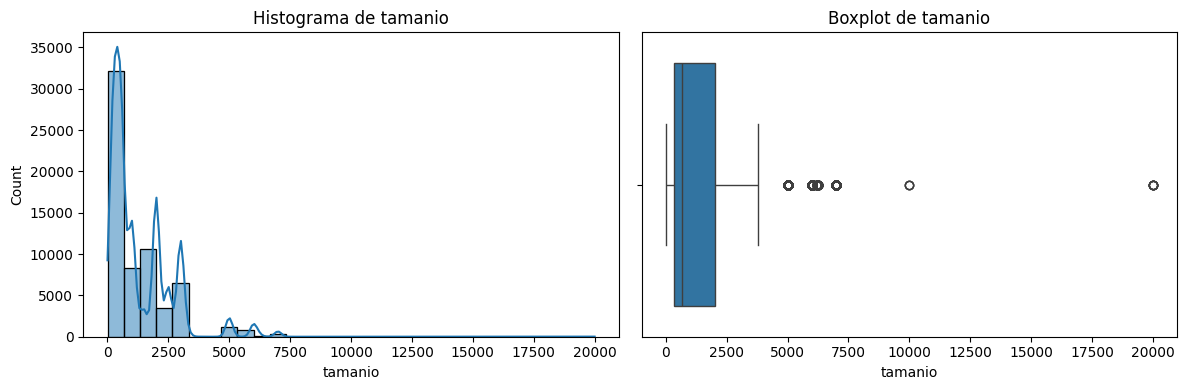

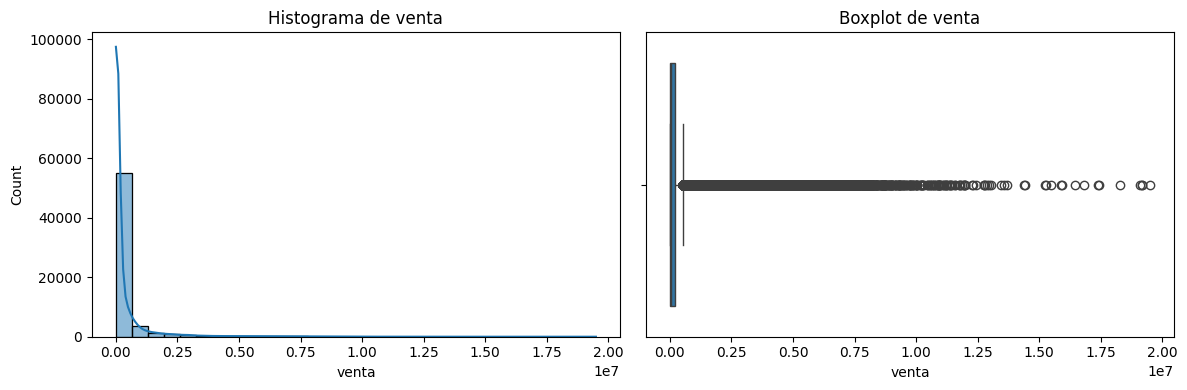

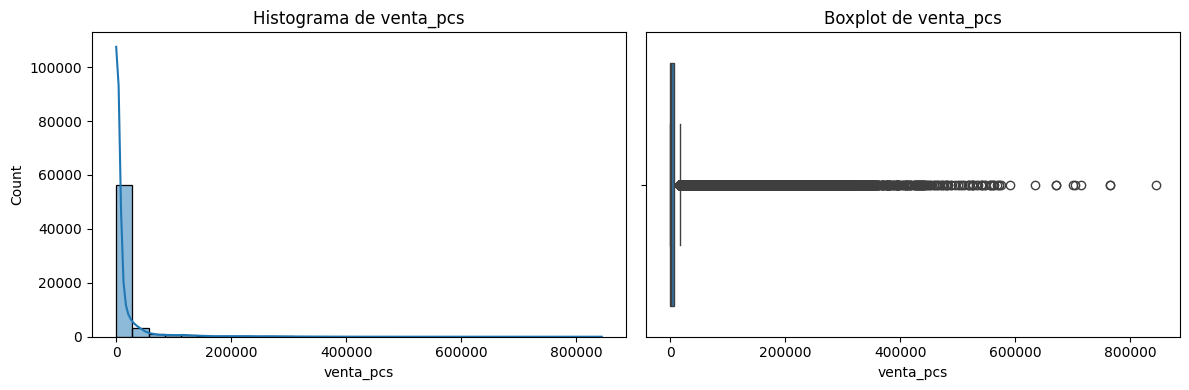

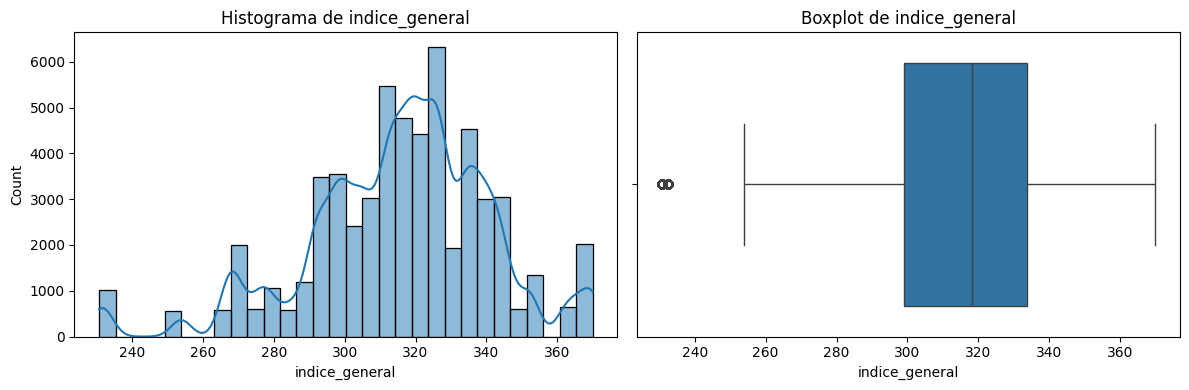

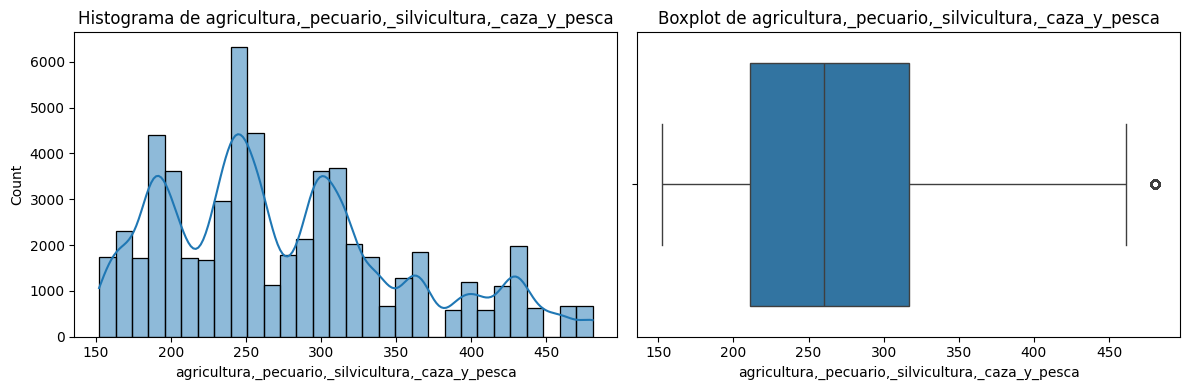

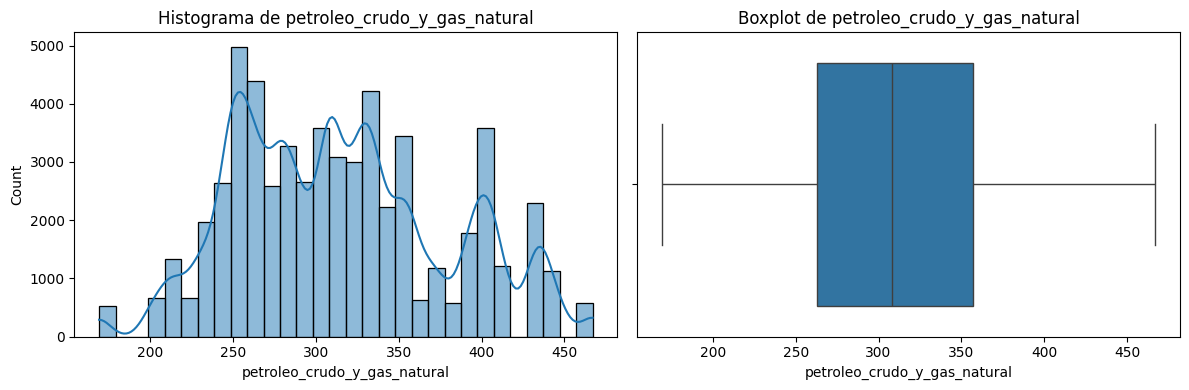

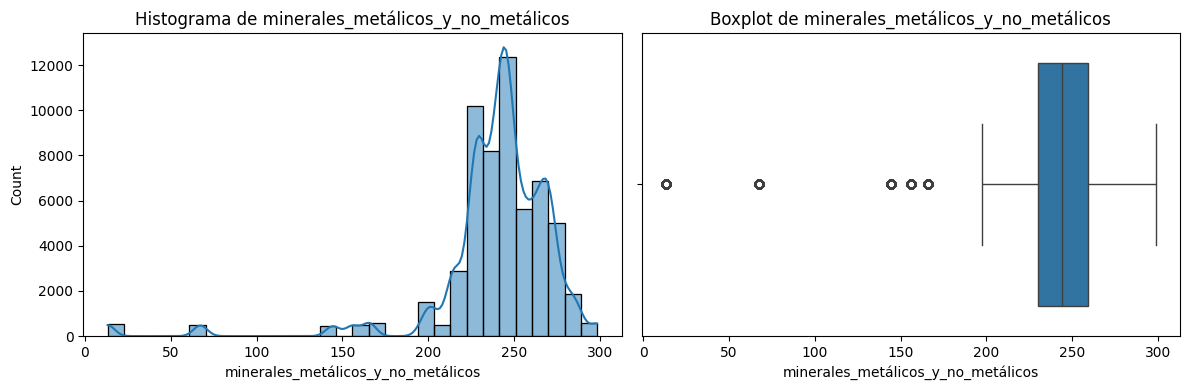

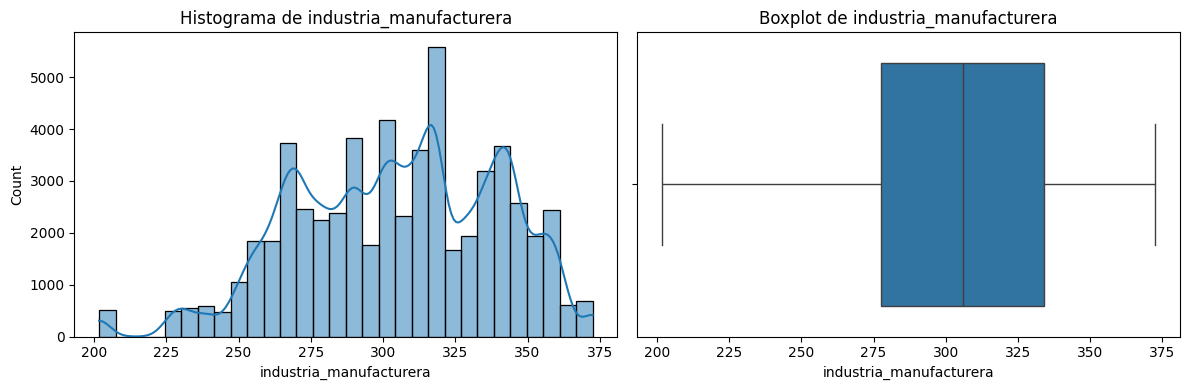

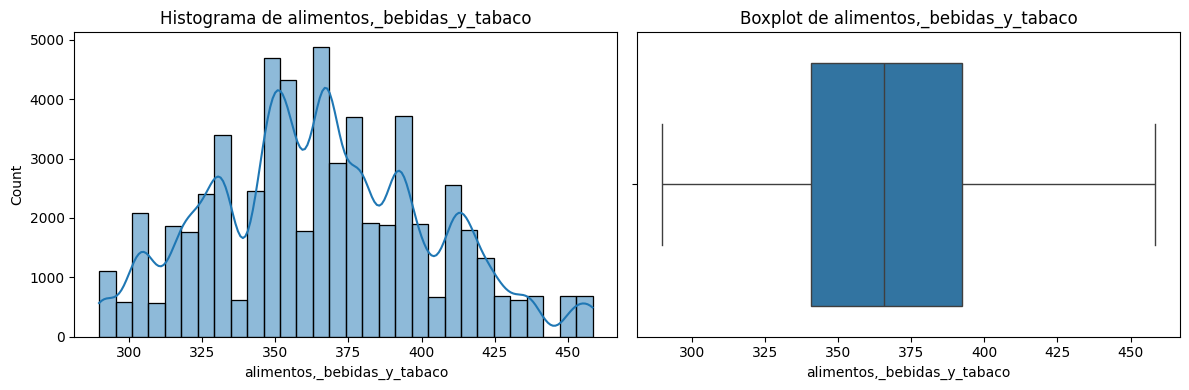

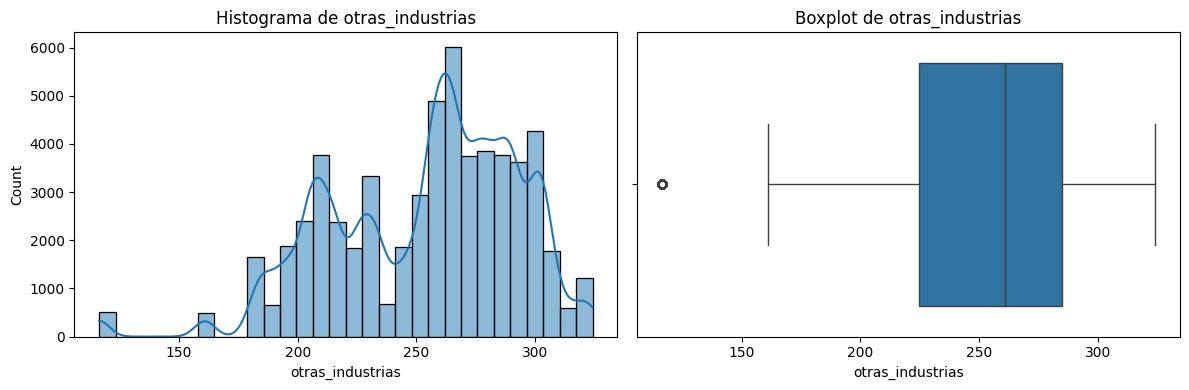

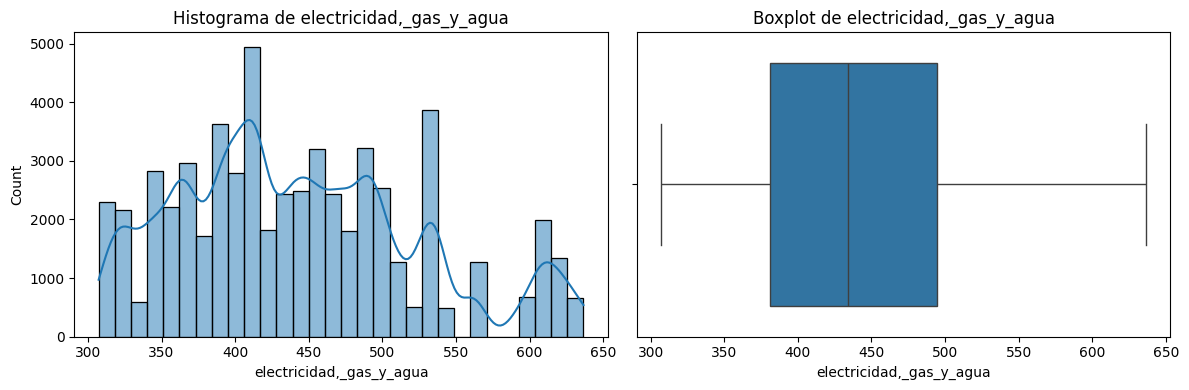

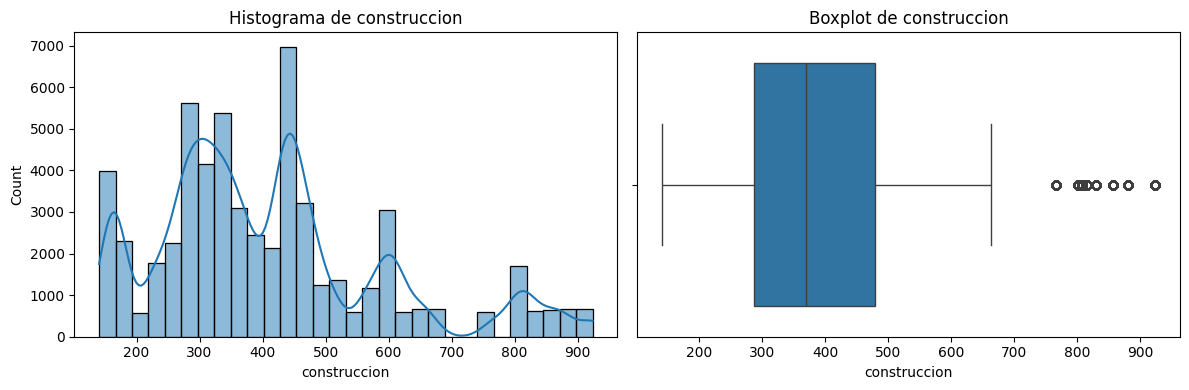

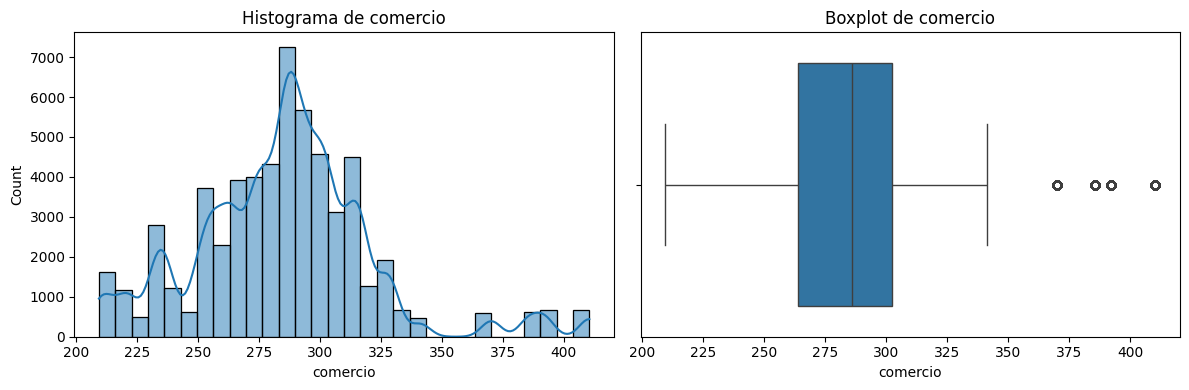

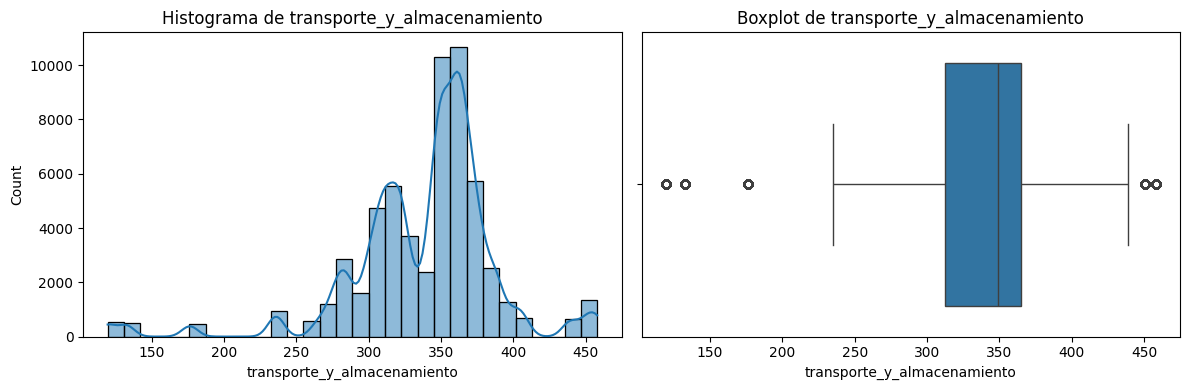

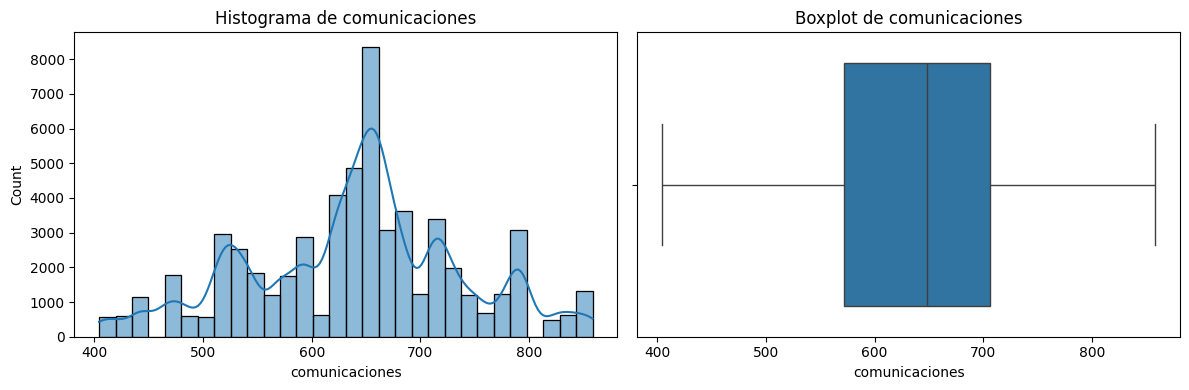

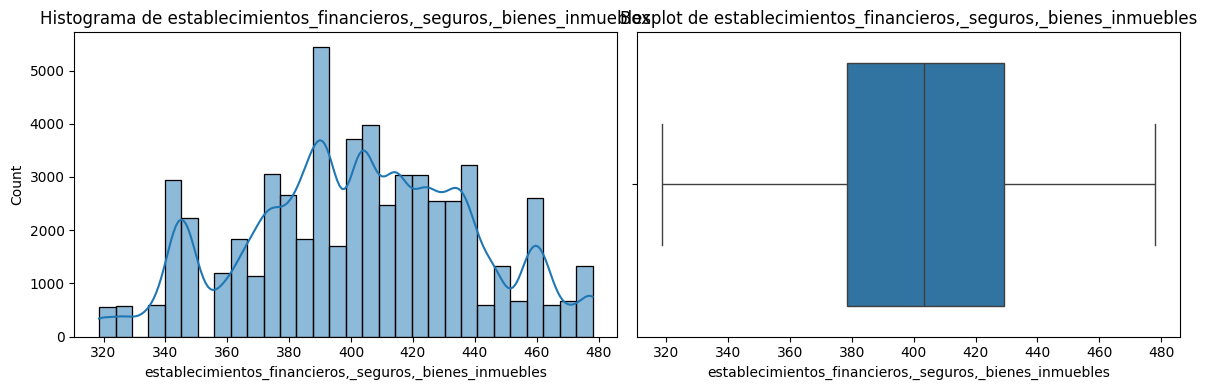

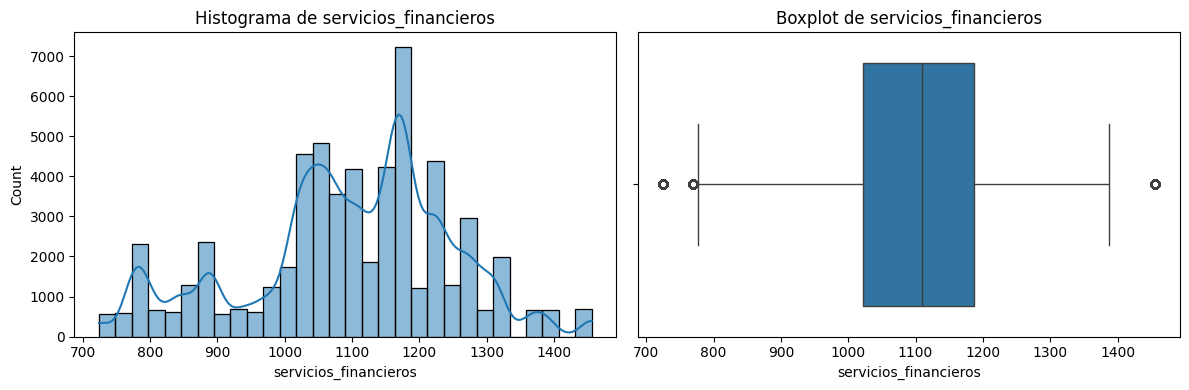

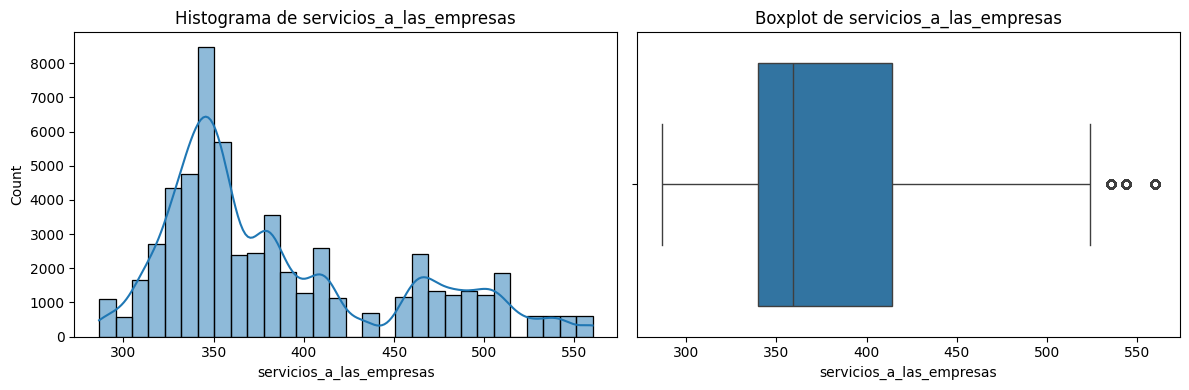

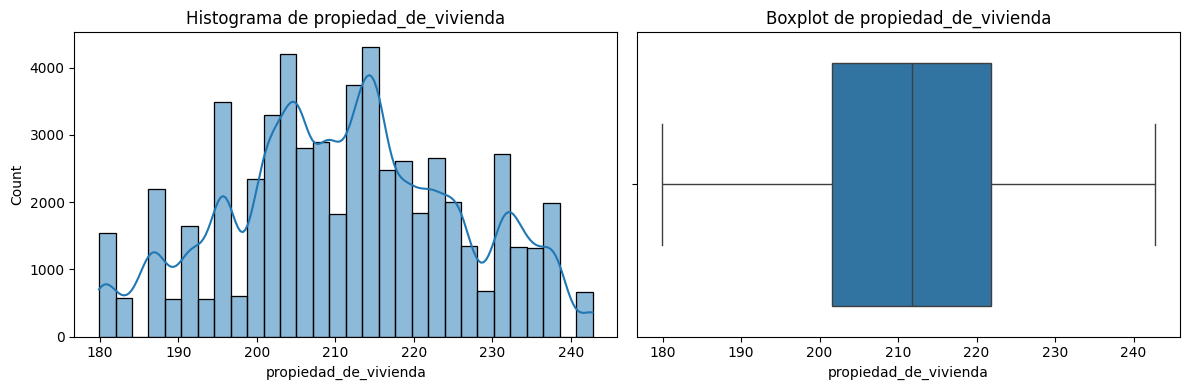

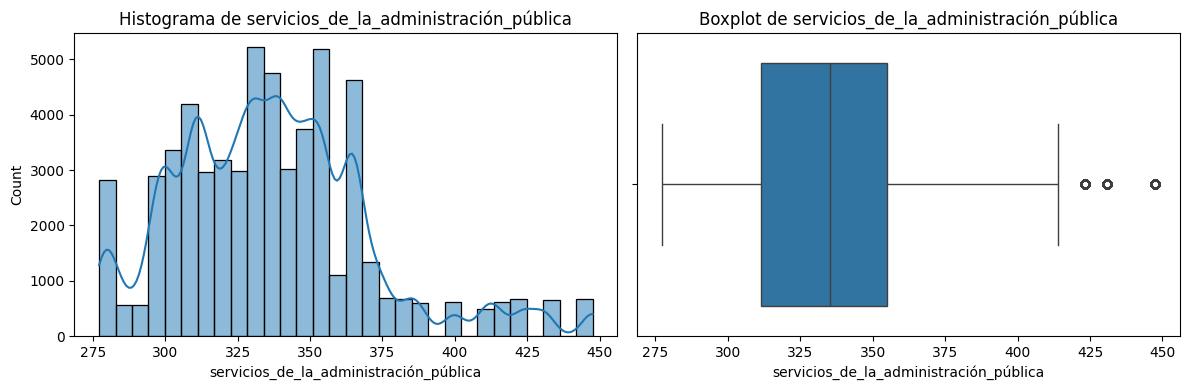

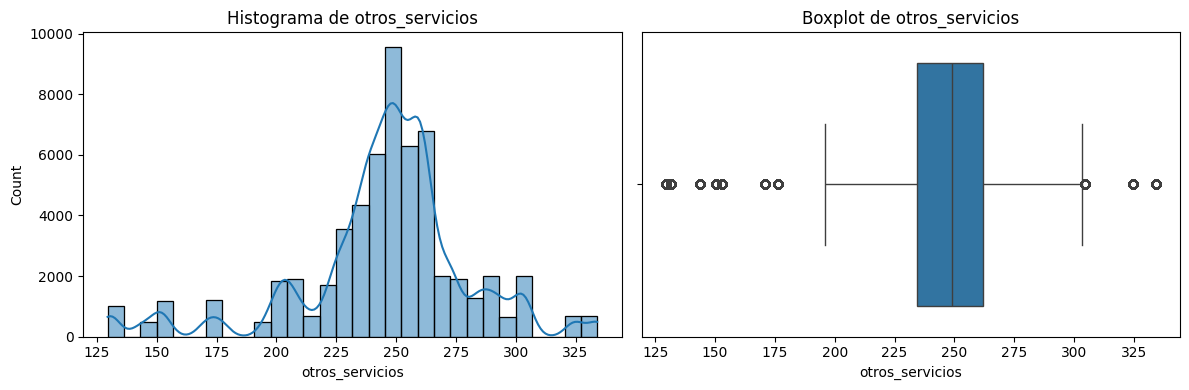

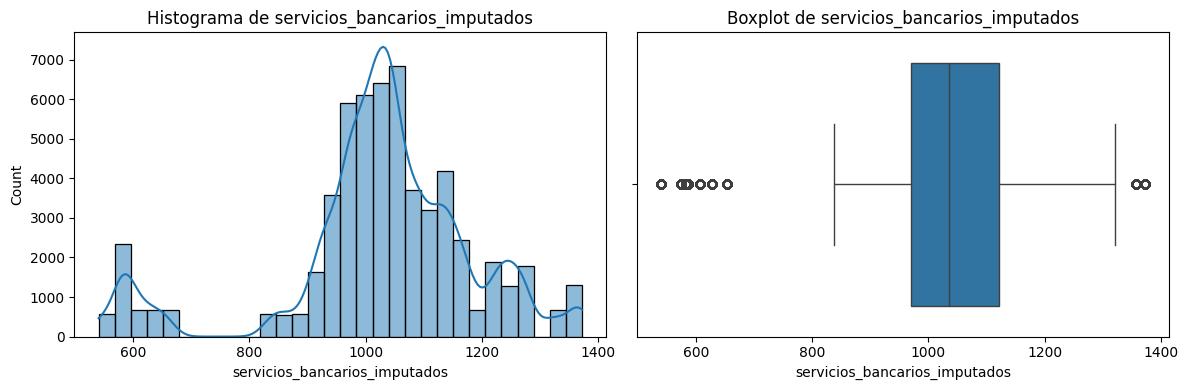

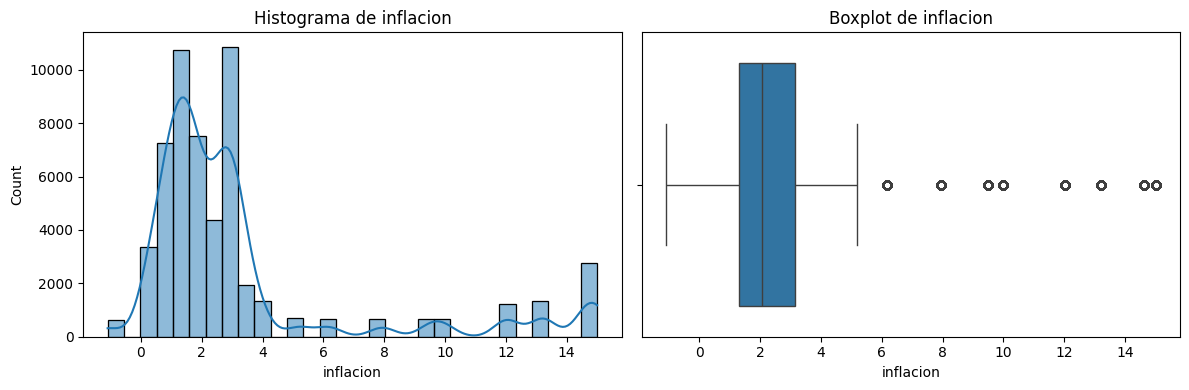

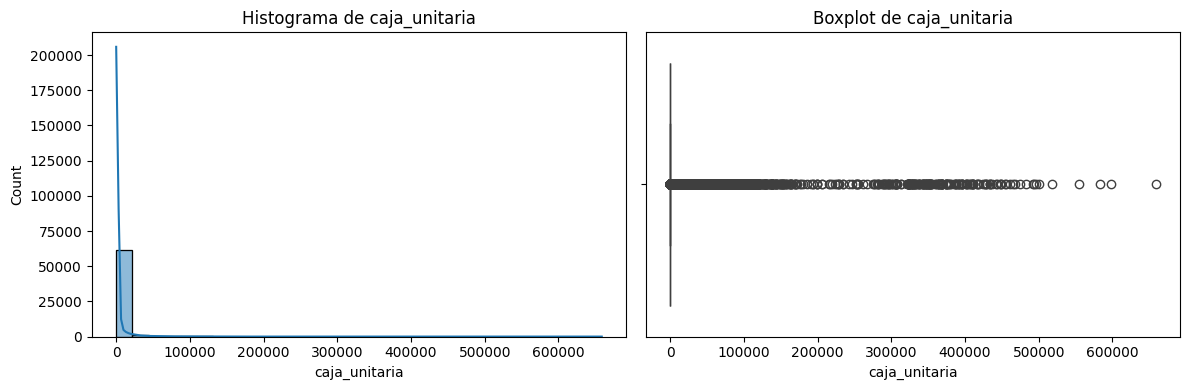

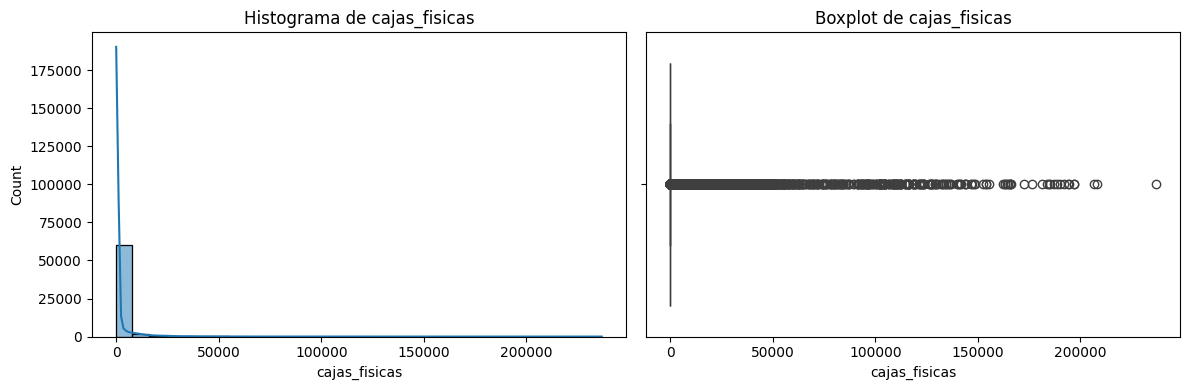

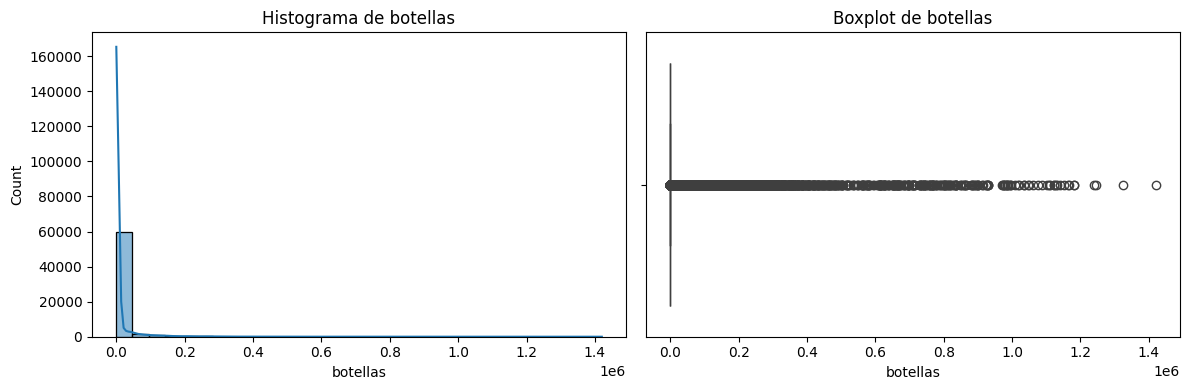

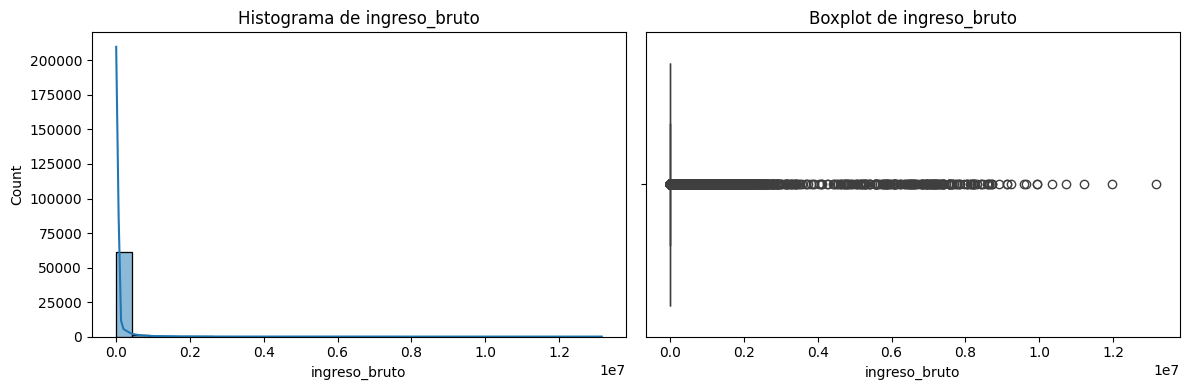

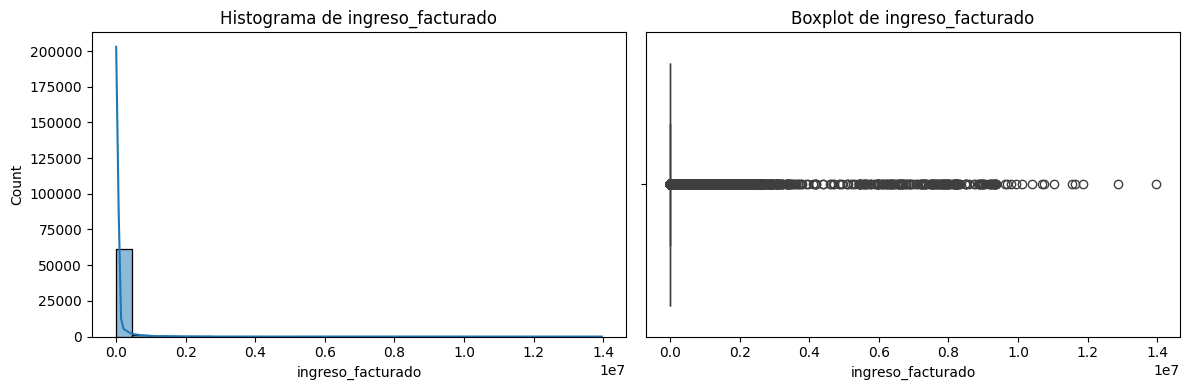

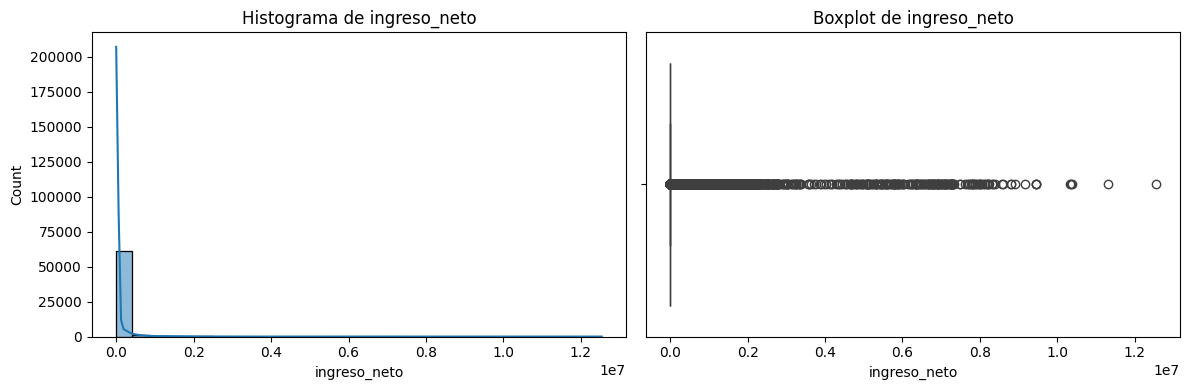

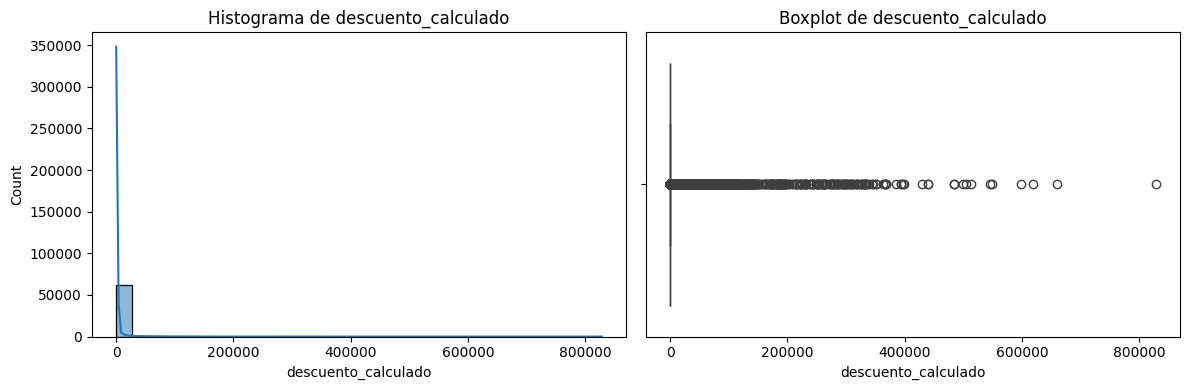

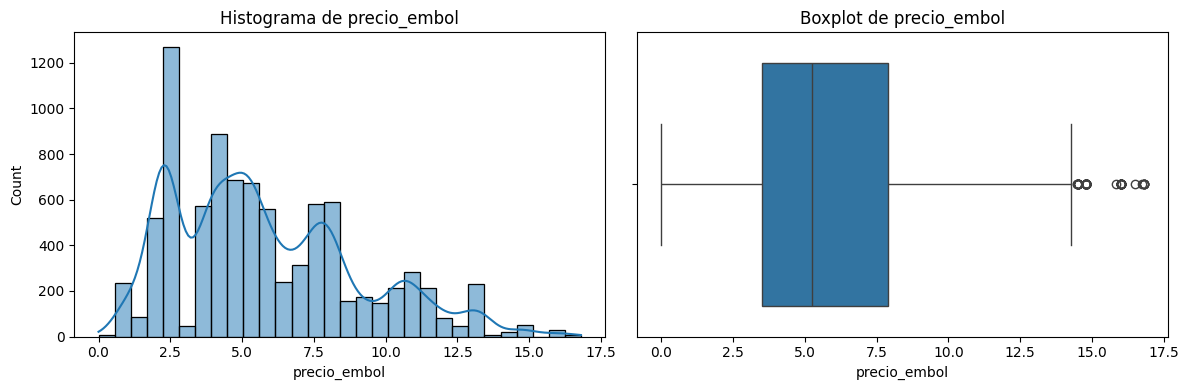

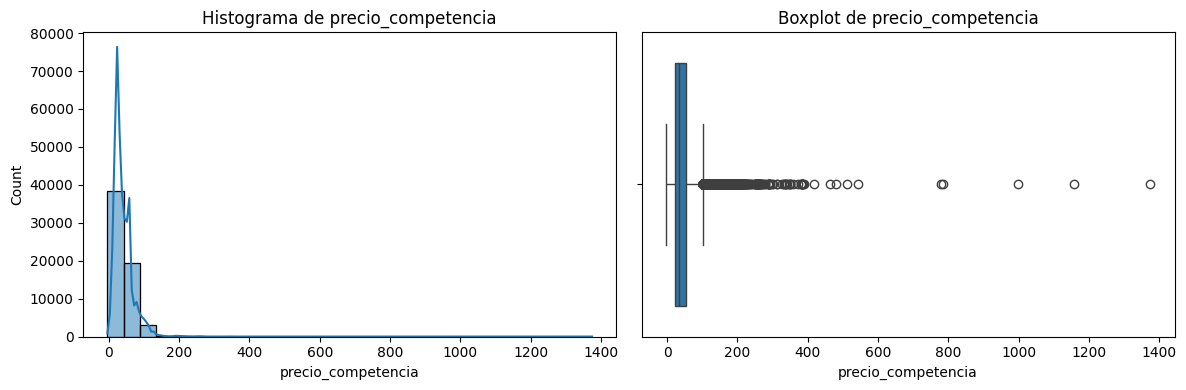

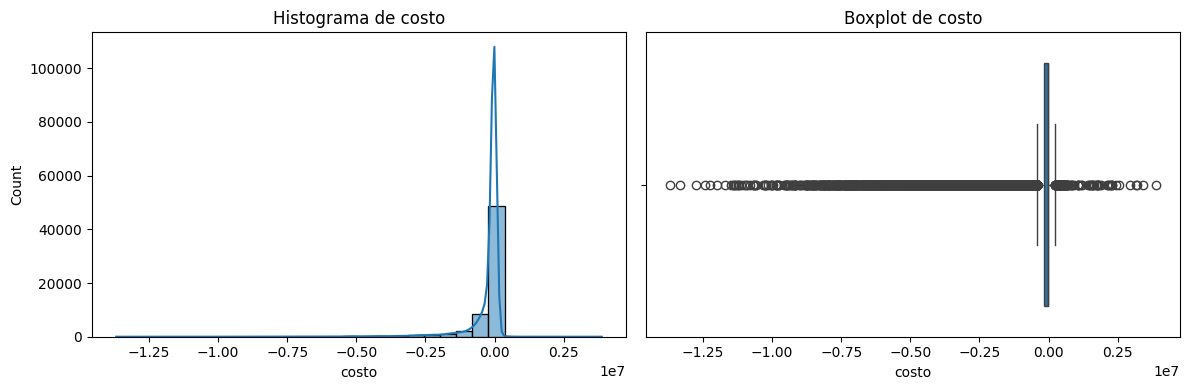

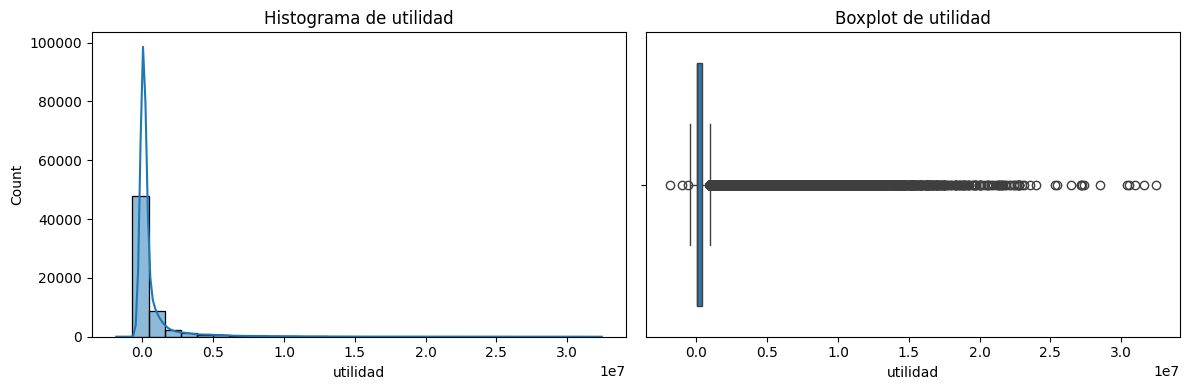

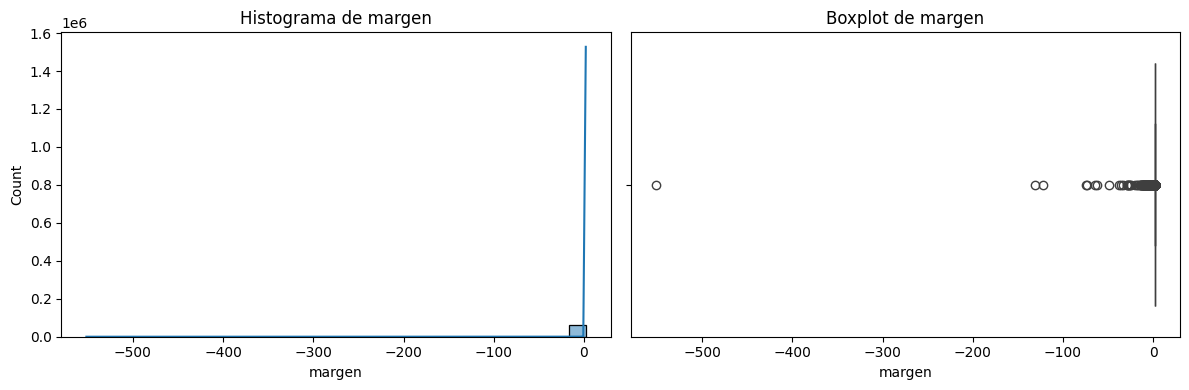

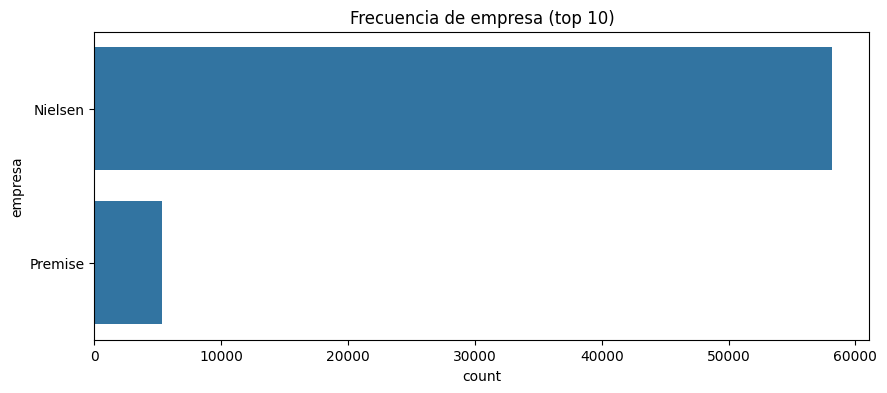

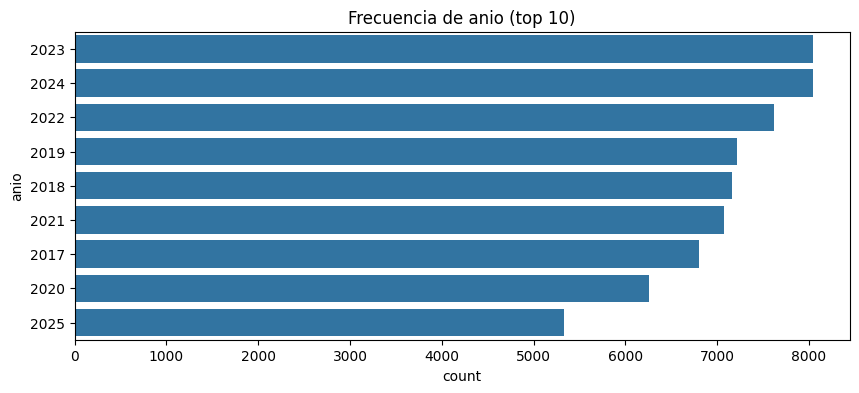

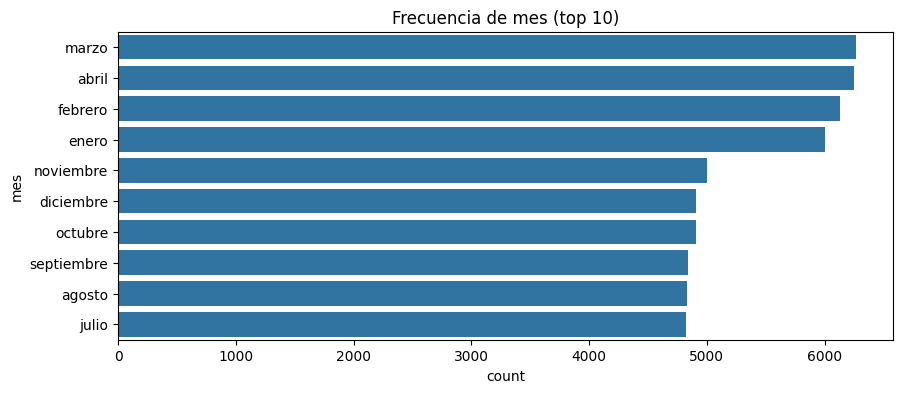

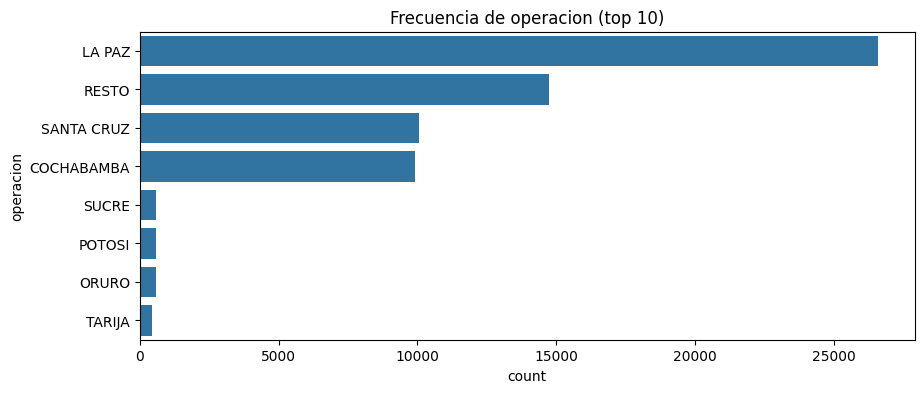

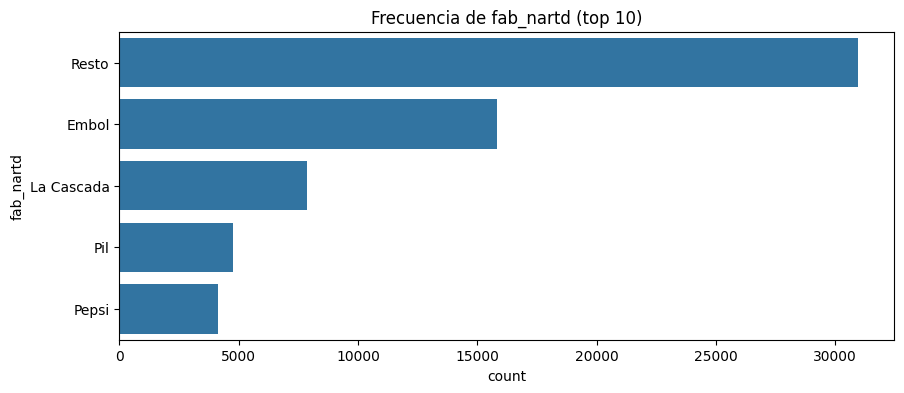

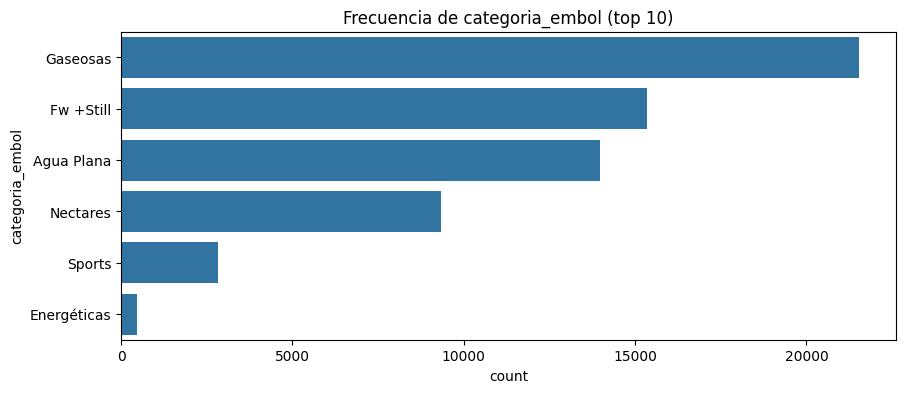

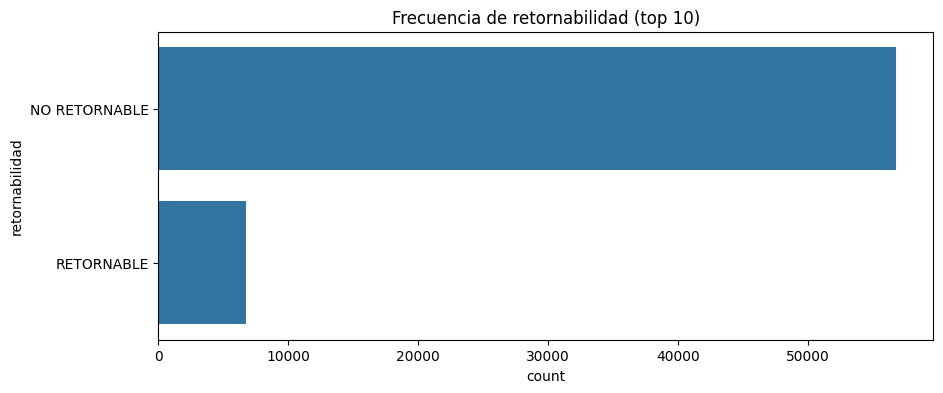

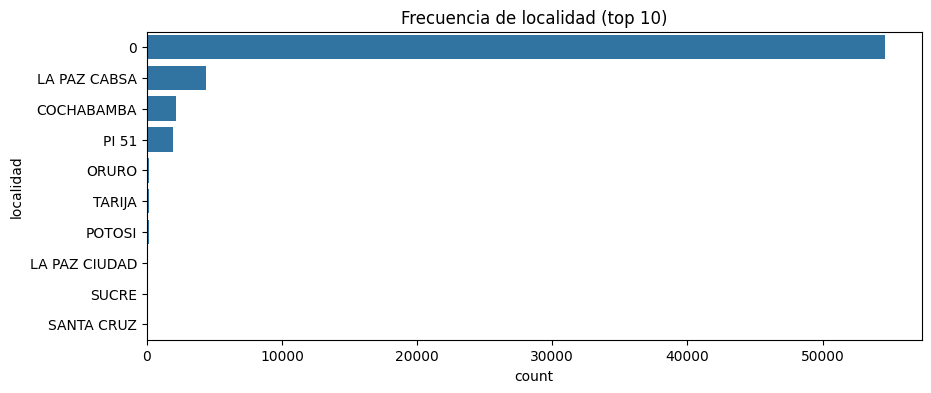

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Histograma de {col}')

    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')

    plt.tight_layout()
    plt.show()

for col in object_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().iloc[:10].index)
    plt.title(f'Frecuencia de {col} (top 10)')
    plt.show()


In [ ]:
def detect_outliers_zscore(df, threshold=3):
    numeric_df = df.select_dtypes(include=np.number)
    z_scores = np.abs(stats.zscore(numeric_df, nan_policy='omit'))
    return (z_scores > threshold).sum(axis=0)

In [ ]:
detect_outliers_zscore(df)

C:\Users\esses\AppData\Roaming\Python\Python312\site-packages\numpy\core\_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\esses\AppData\Roaming\Python\Python312\site-packages\numpy\core\_methods.py:152: RuntimeWarning: invalid value encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)


tamanio                                                    1263
venta                                                      1375
venta_pcs                                                  1397
indice_general                                             1019
agricultura,_pecuario,_silvicultura,_caza_y_pesca             0
petroleo_crudo_y_gas_natural                                  0
minerales_metálicos_y_no_metálicos                         1019
industria_manufacturera                                       0
alimentos,_bebidas_y_tabaco                                   0
otras_industrias                                            519
electricidad,_gas_y_agua                                      0
construccion                                                  0
comercio                                                    670
transporte_y_almacenamiento                                1491
comunicaciones                                                0
establecimientos_financieros,_seguros,_b

In [ ]:
# Asimetría de las variables numéricas
numeric_df = df.select_dtypes(include=np.number)
skewness = numeric_df.skew().sort_values(ascending=False)
skewness

descuento_calculado                                         17.723773
caja_unitaria                                               14.128645
ingreso_facturado                                           13.864928
ingreso_bruto                                               13.761840
ingreso_neto                                                13.726120
cajas_fisicas                                               11.632058
botellas                                                    10.481724
venta_pcs                                                    6.332519
venta                                                        6.124206
utilidad                                                     5.883425
inflacion                                                    2.041214
tamanio                                                      1.989390
construccion                                                 0.924639
servicios_a_las_empresas                                     0.922668
servicios_de_la_admi

In [ ]:
def plot_time_trends(df, time_col, value_col):
    if time_col not in df.columns or value_col not in df.columns:
        print("Columnas no encontradas en el DataFrame.")
        return
    df[time_col] = pd.to_datetime(df[time_col], errors="coerce")
    trend = df.groupby(time_col)[value_col].mean()
    trend.plot(figsize=(12, 6), title=f"Tendencia temporal de {value_col}")
    plt.show()

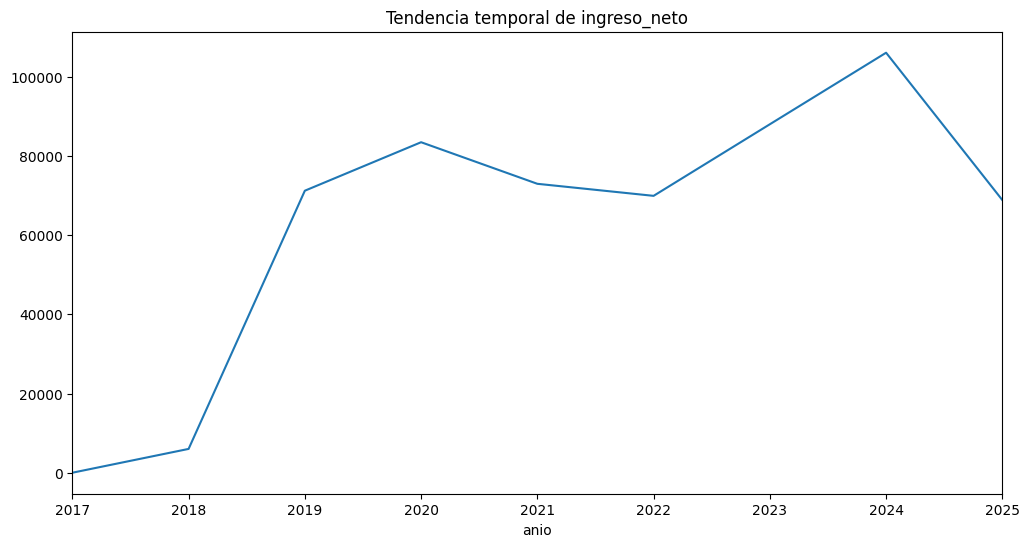

In [ ]:
plot_time_trends(df, 'anio', 'ingreso_neto')

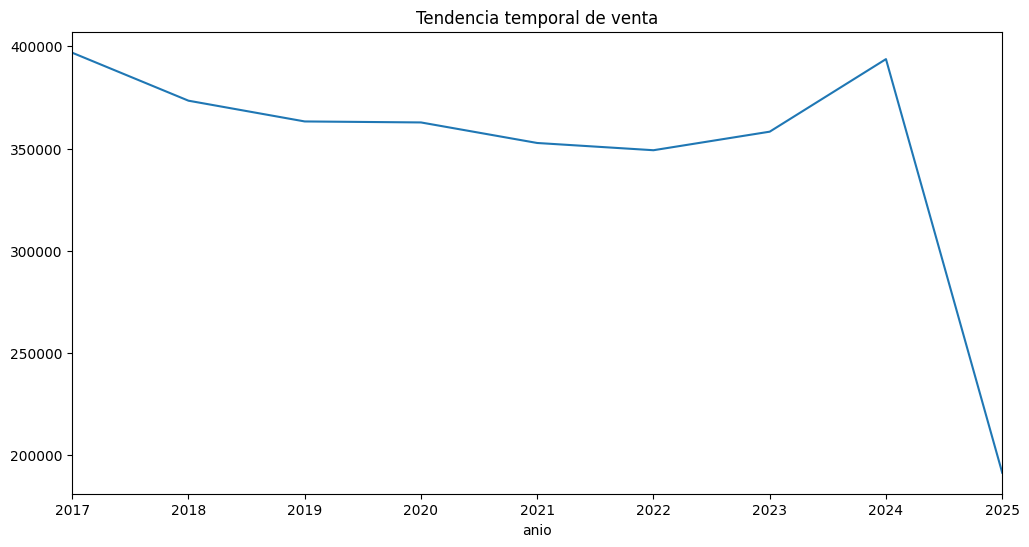

In [ ]:
plot_time_trends(df, 'anio', 'venta')

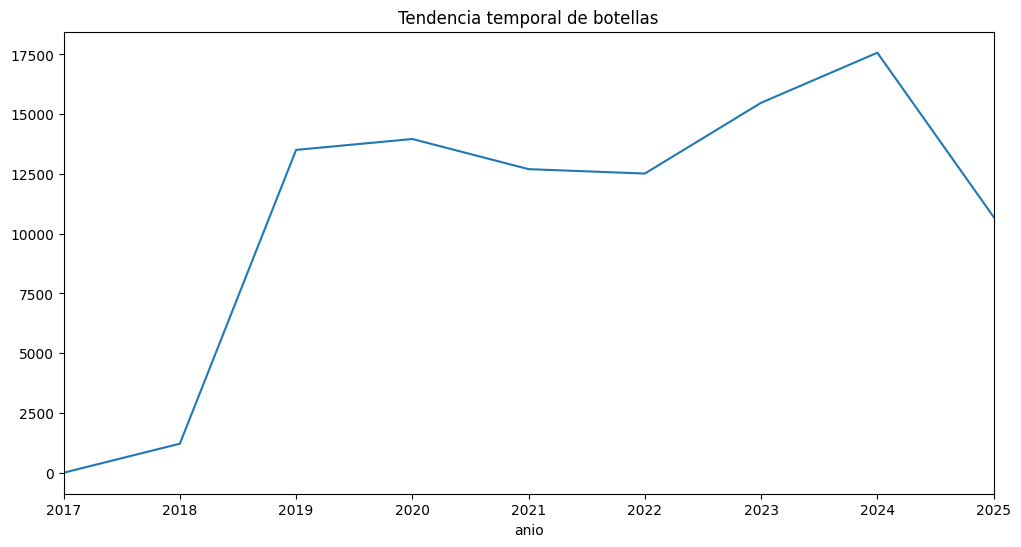

In [ ]:
plot_time_trends(df, 'anio', 'botellas')

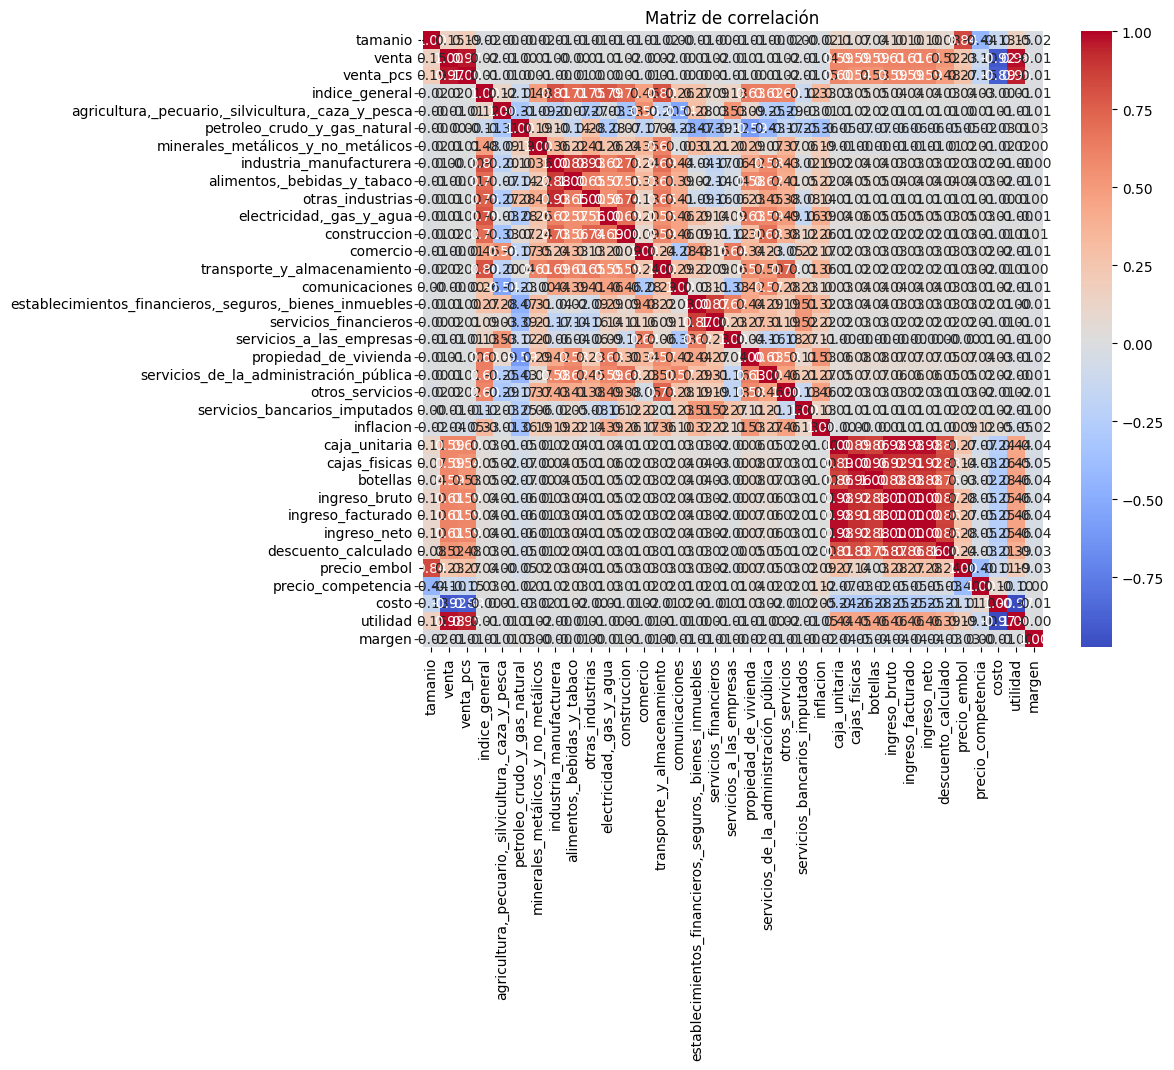

In [ ]:
# Matriz de correlación
corr = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de correlación")
plt.show()

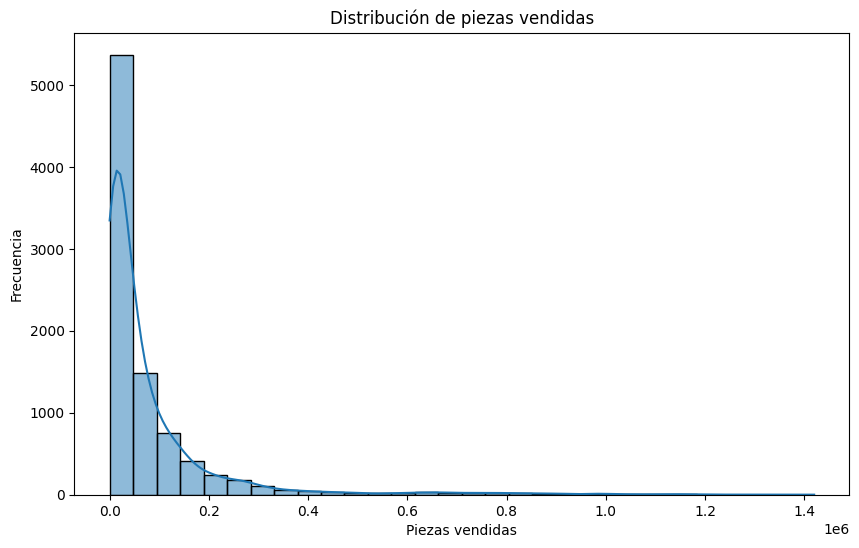

In [ ]:
# Análisis de variable objetivo de Embol
target_col = 'botellas'
df_embol_filtered = df[df[target_col] > 0] # Filtrando sólo lo que vende Embol
plt.figure(figsize=(10,6))
sns.histplot(df_embol_filtered[target_col], bins=30, kde=True)
plt.title("Distribución de piezas vendidas")
plt.xlabel("Piezas vendidas")
plt.ylabel("Frecuencia")
plt.show()

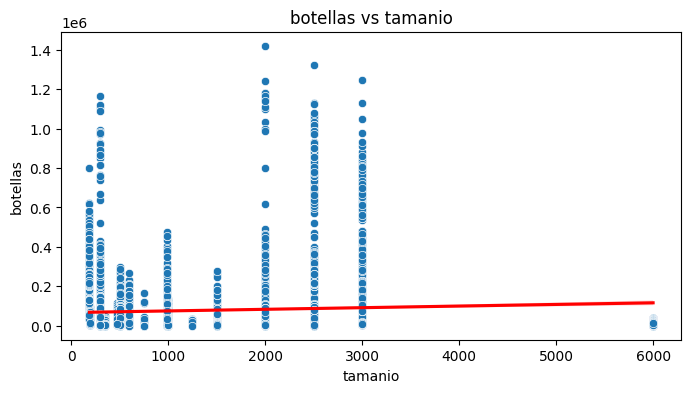

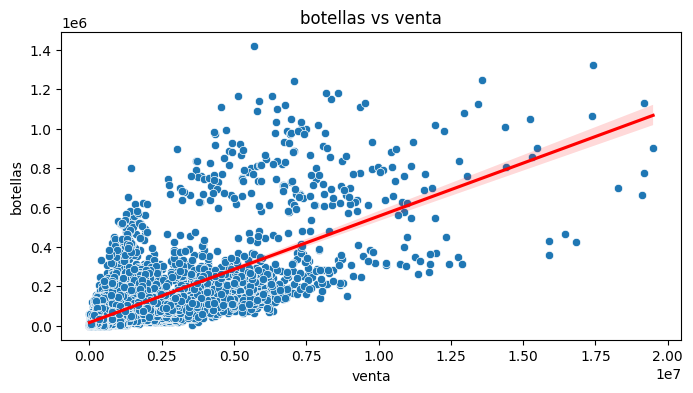

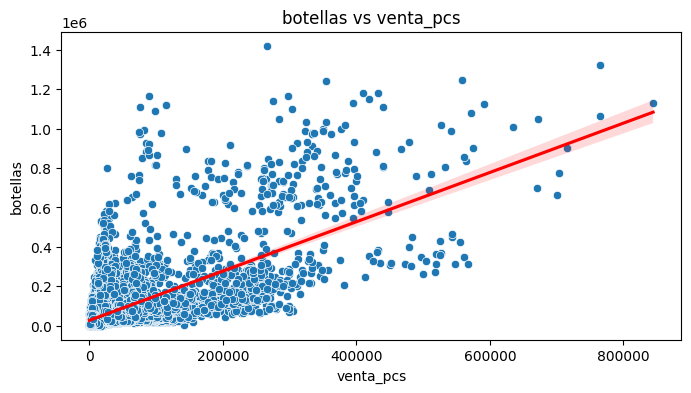

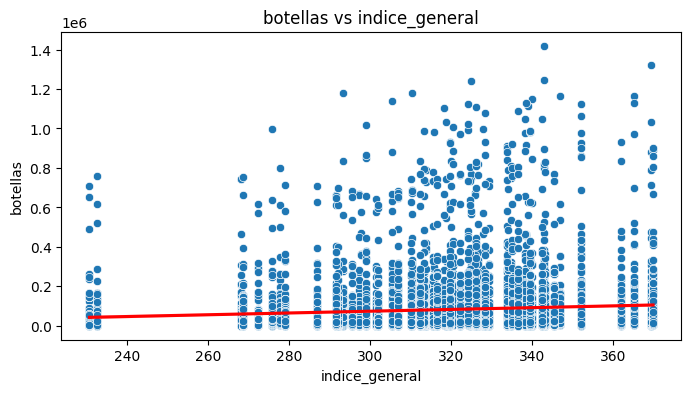

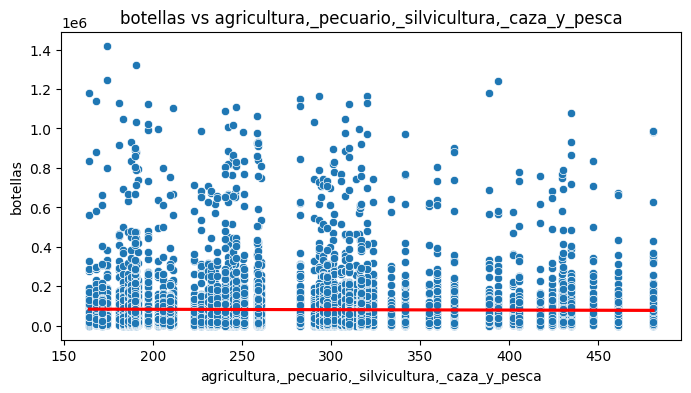

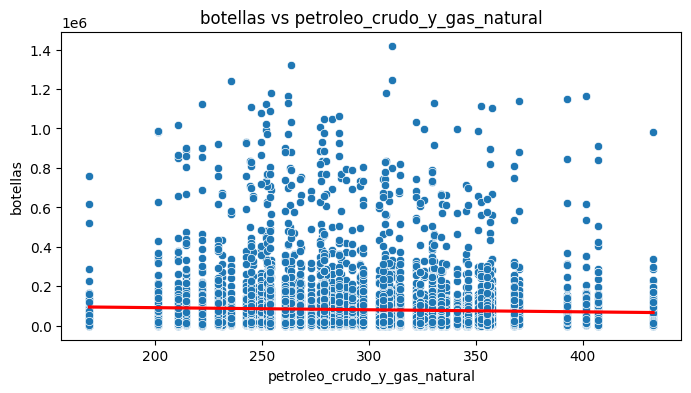

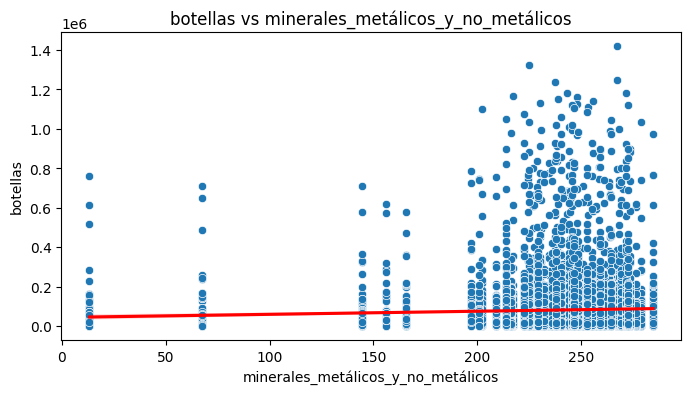

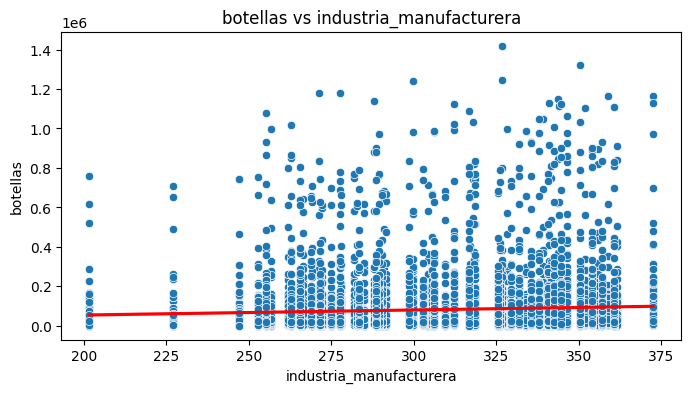

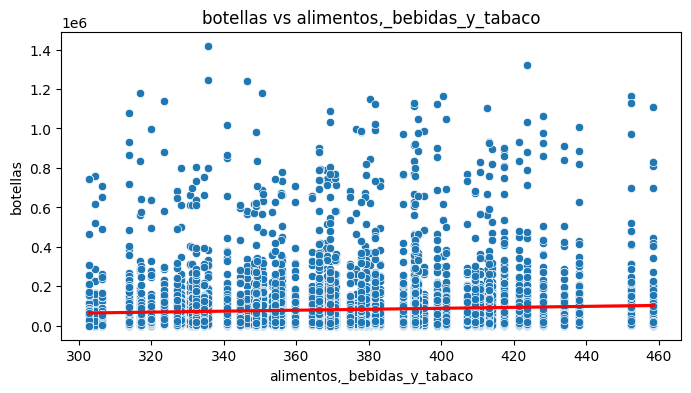

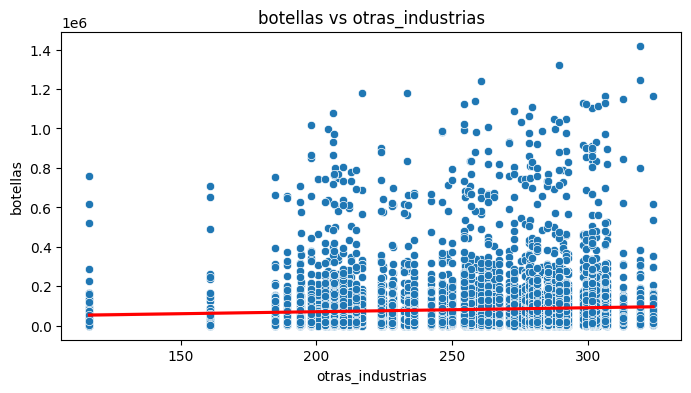

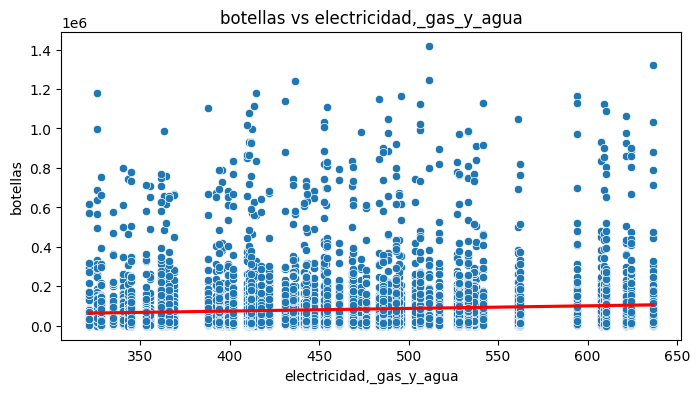

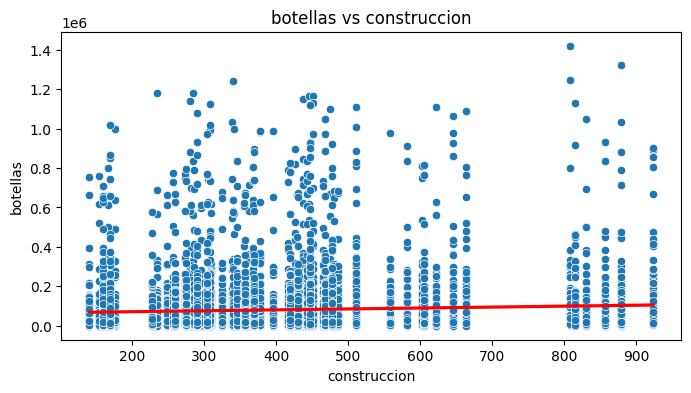

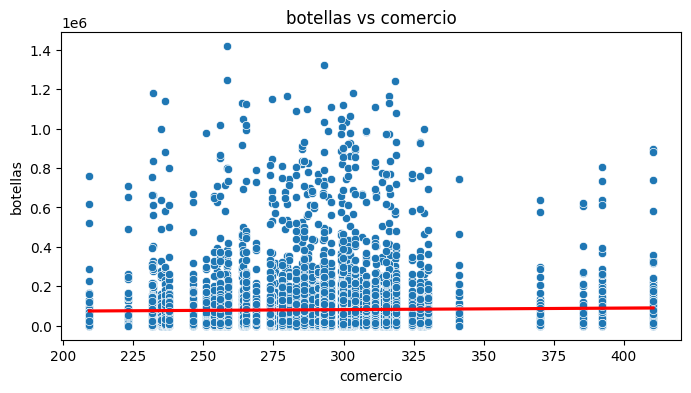

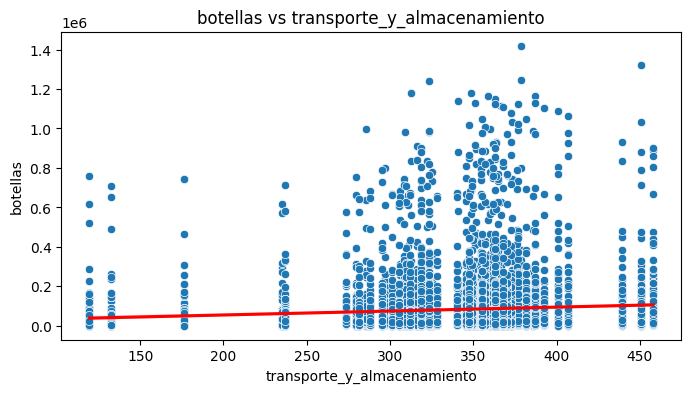

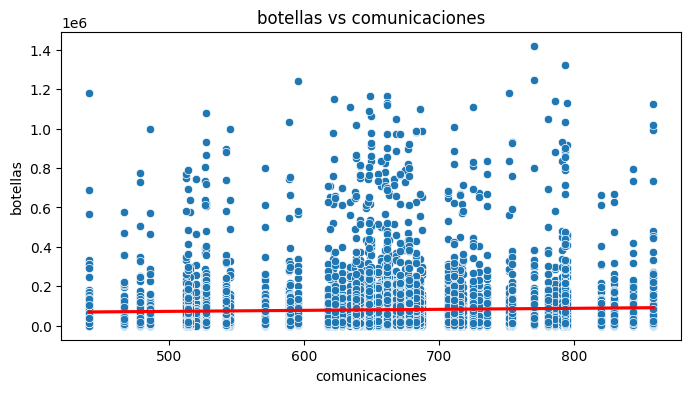

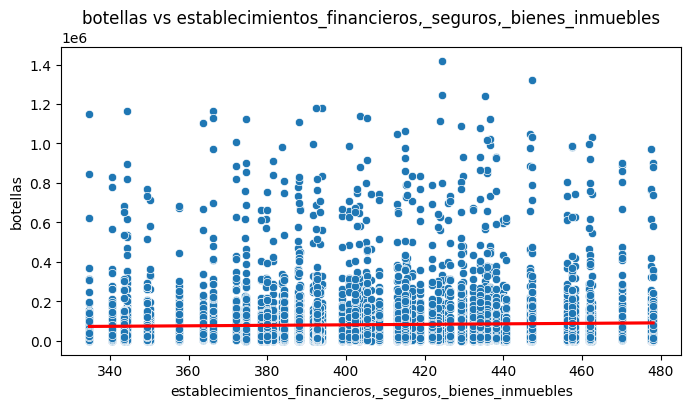

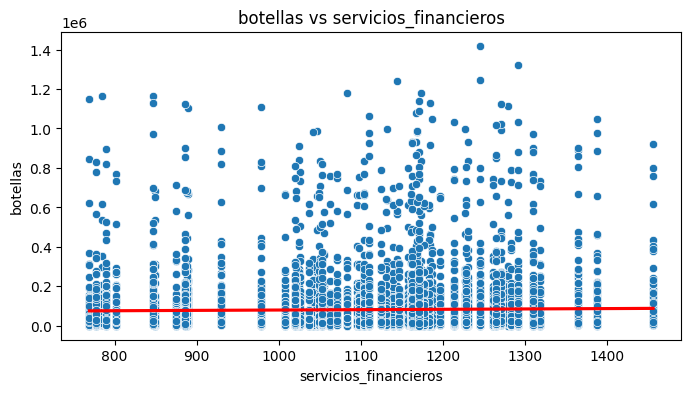

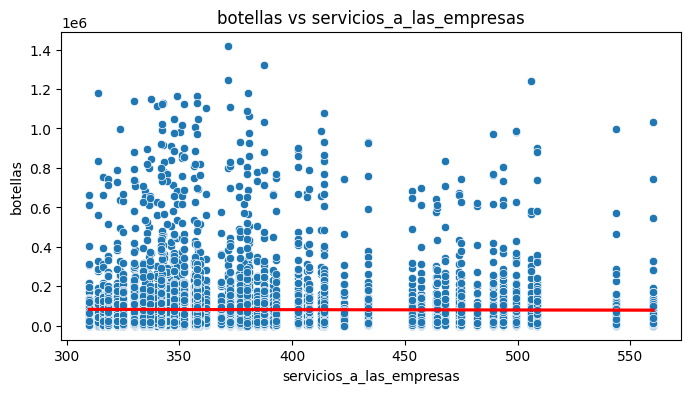

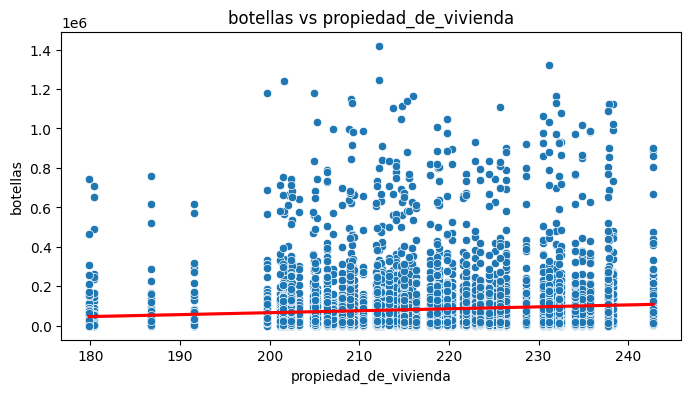

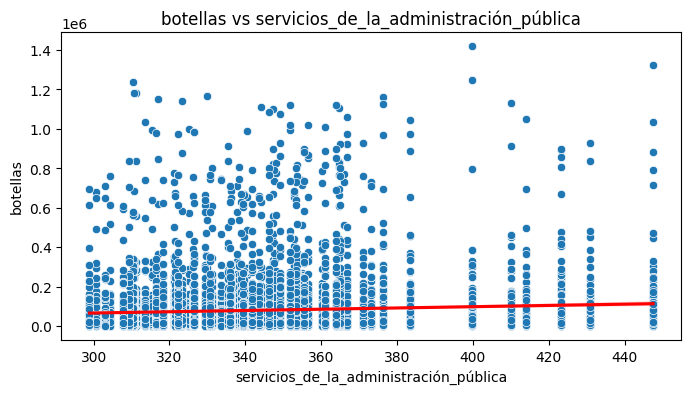

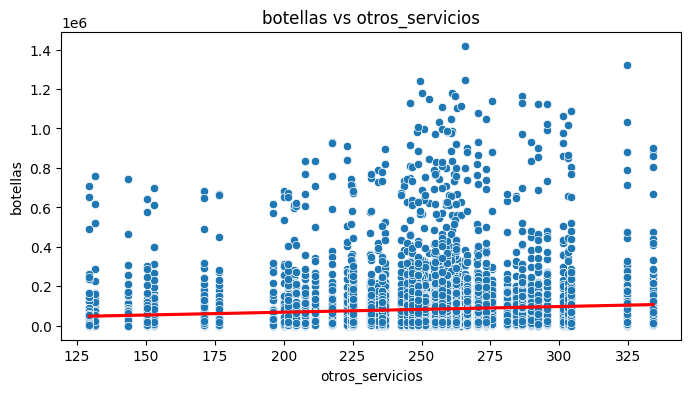

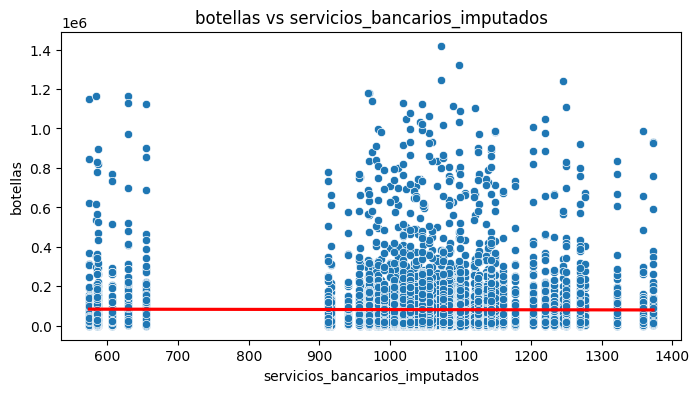

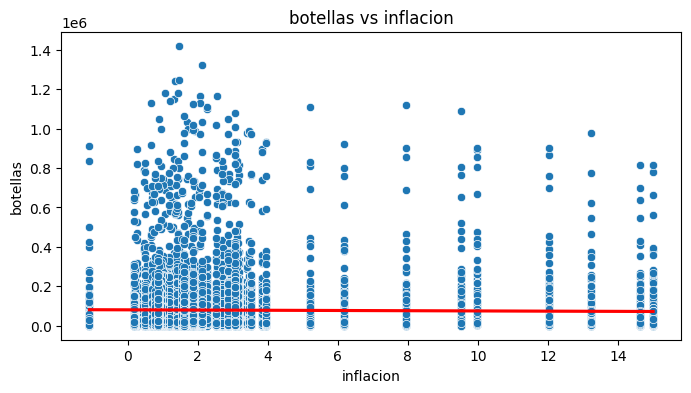

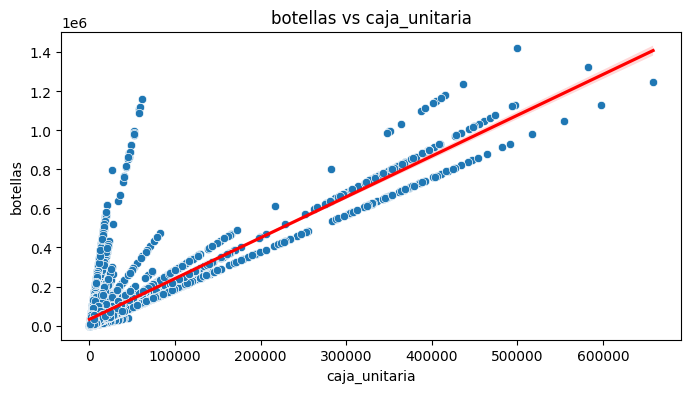

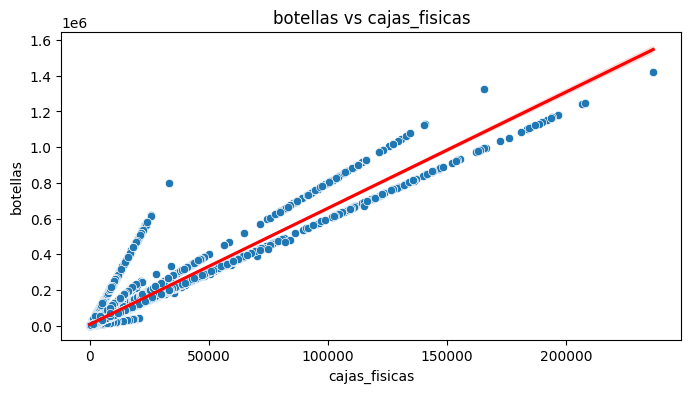

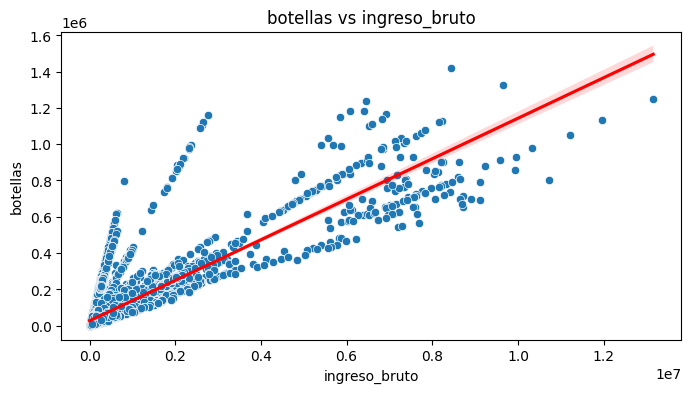

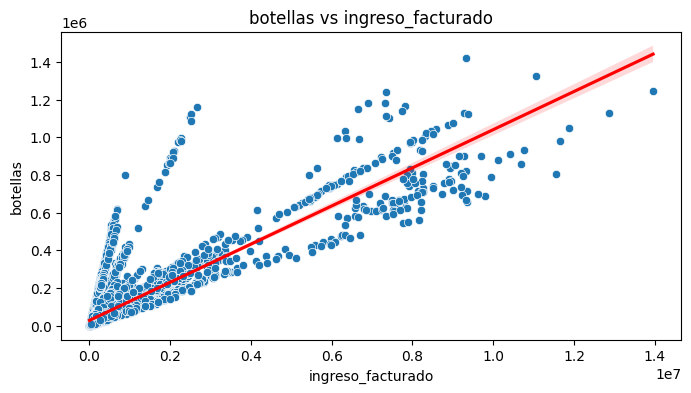

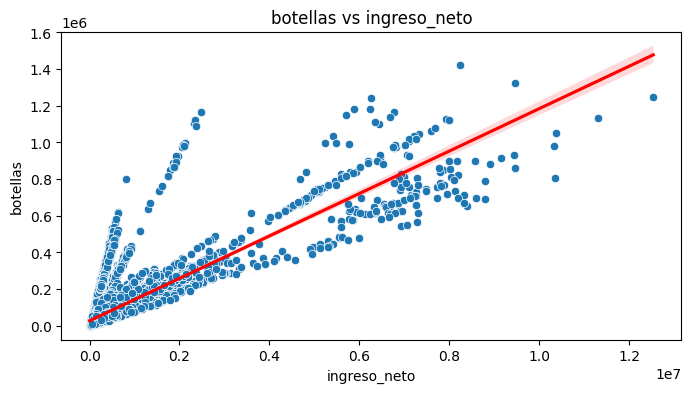

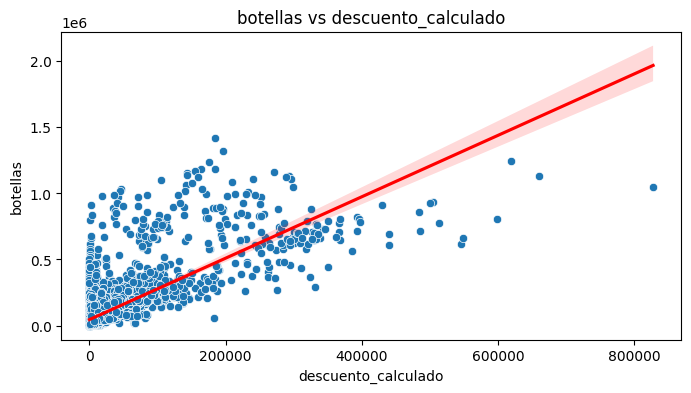

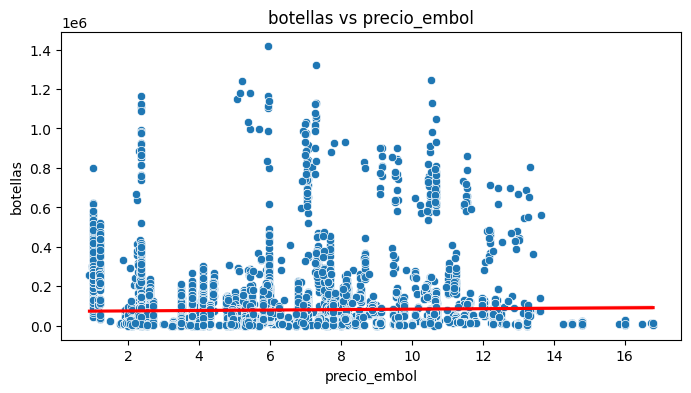

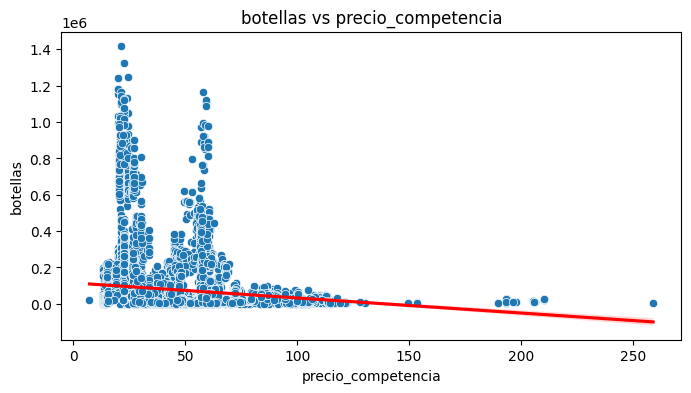

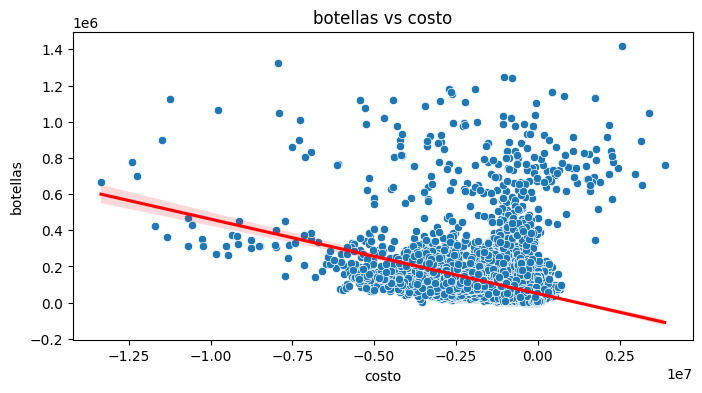

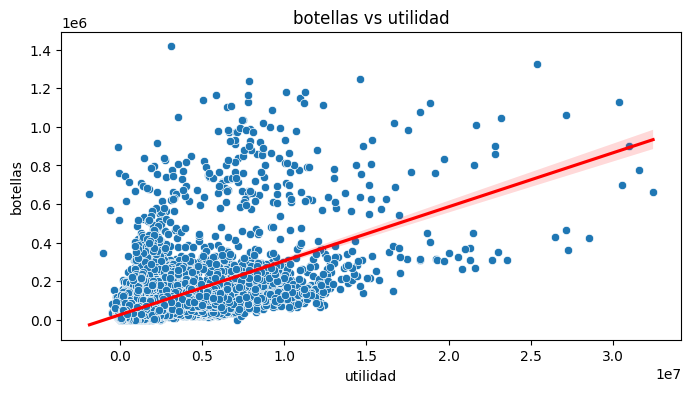

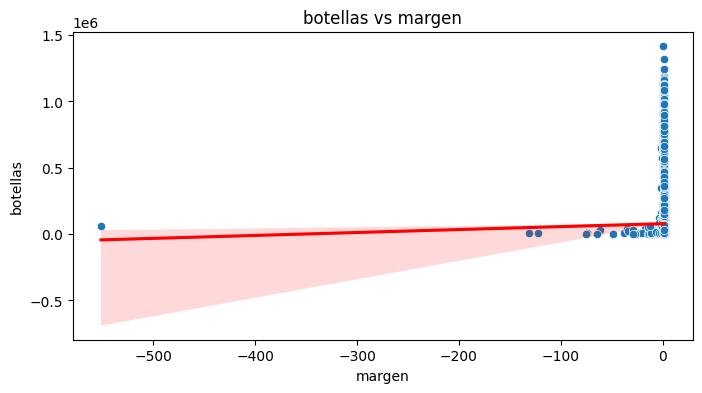

In [ ]:
# Análisis bivariado para variable objetivo en Embol
for col in numeric_cols:
    if col != target_col:
        plt.figure(figsize=(8,4))
        sns.scatterplot(x=col, y=target_col, data=df_embol_filtered)
        sns.regplot(x=col, y=target_col, data=df_embol_filtered, scatter=False, color="red")  # línea de tendencia
        plt.title(f"{target_col} vs {col}")
        plt.show()

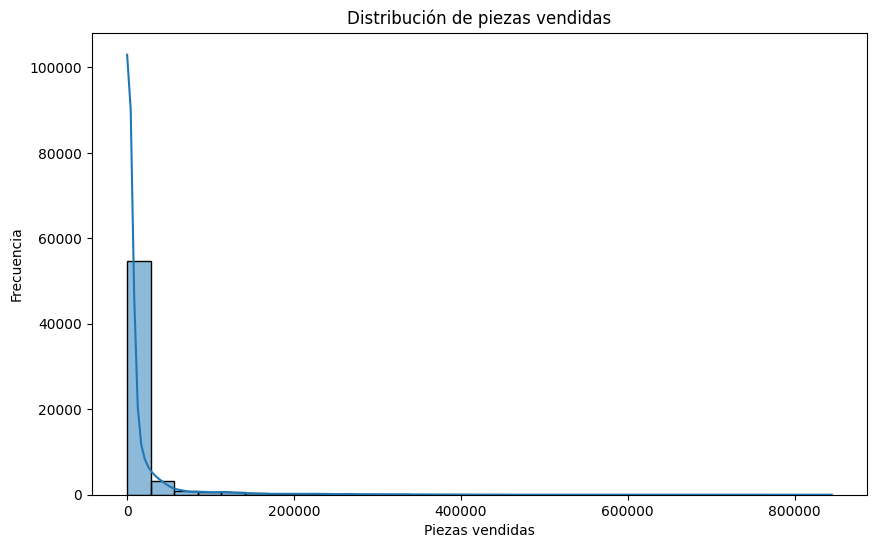

In [ ]:
# Análisis de variable objetivo de competencia
target_col = 'venta_pcs'
plt.figure(figsize=(10,6))
sns.histplot(df[df[target_col] > 0][target_col], bins=30, kde=True)
plt.title("Distribución de piezas vendidas")
plt.xlabel("Piezas vendidas")
plt.ylabel("Frecuencia")
plt.show()

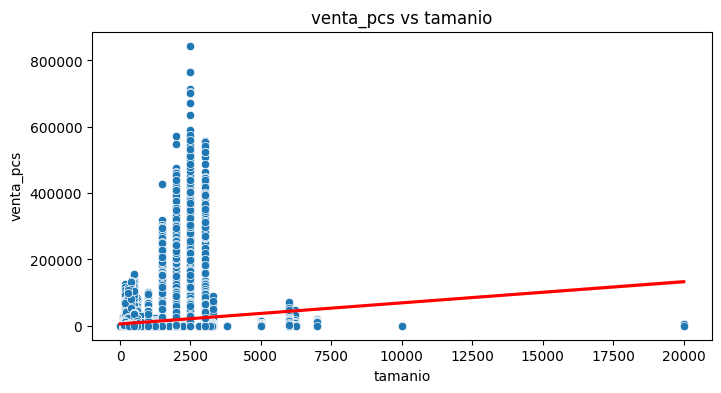

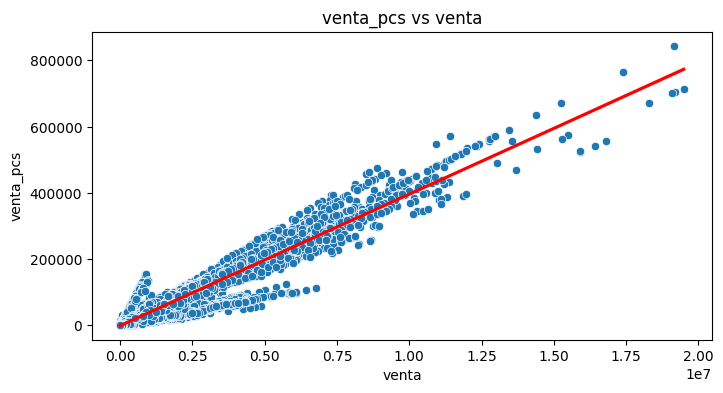

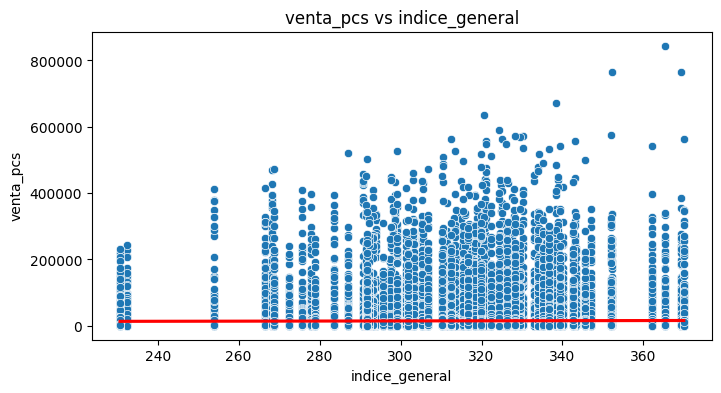

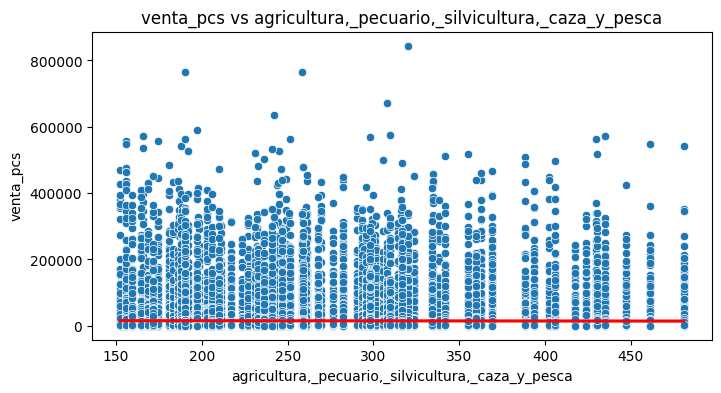

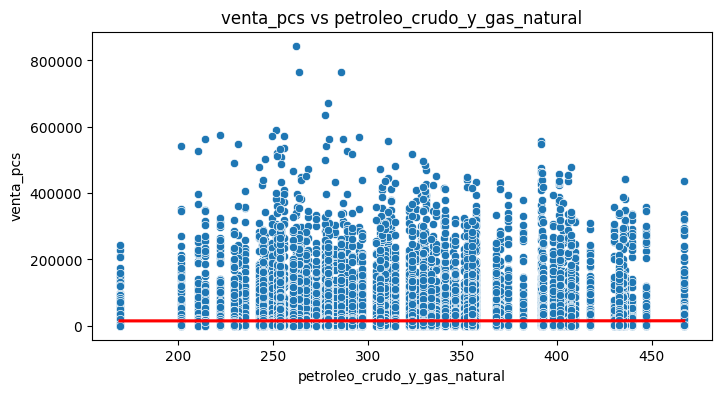

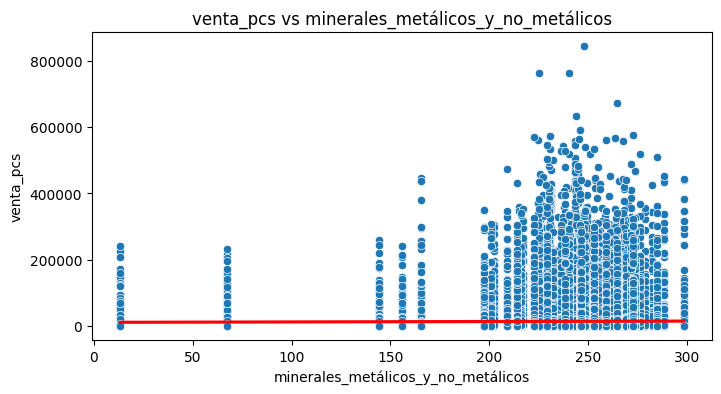

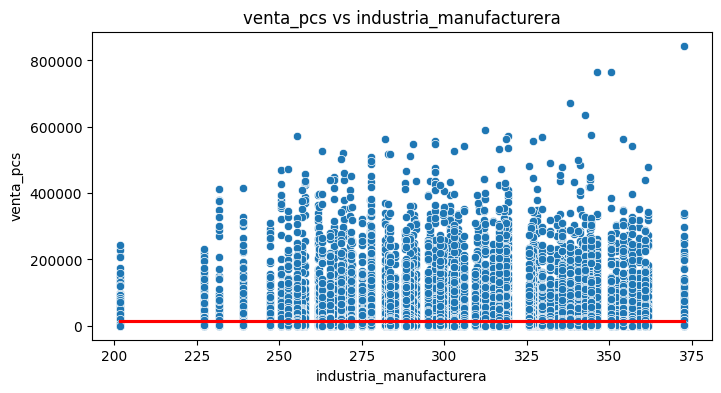

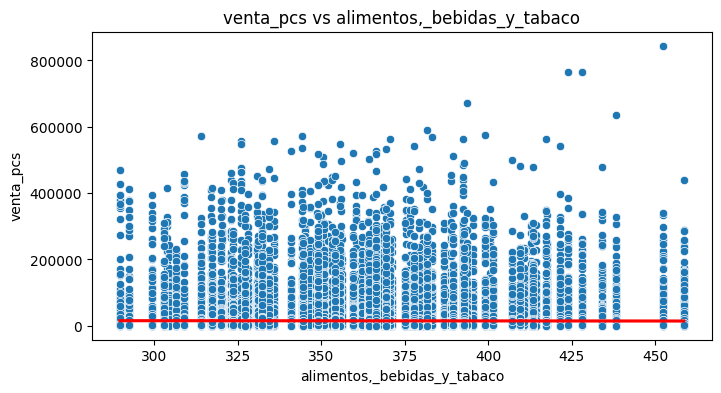

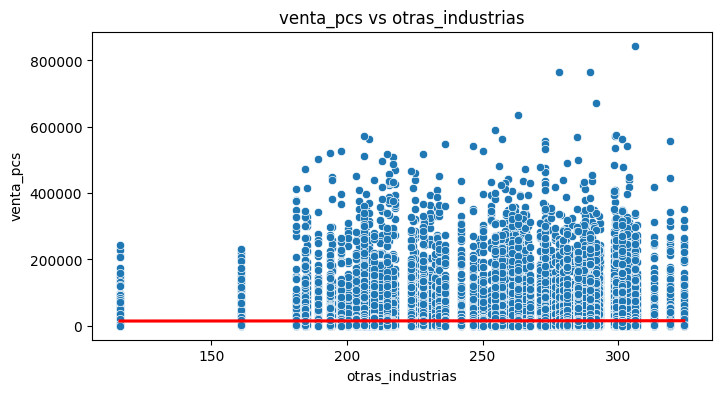

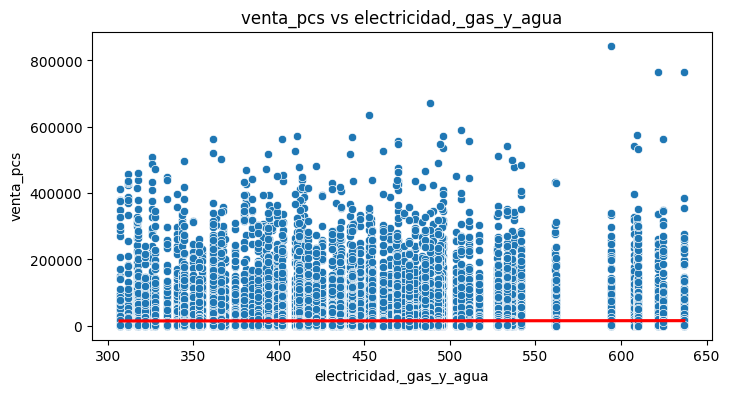

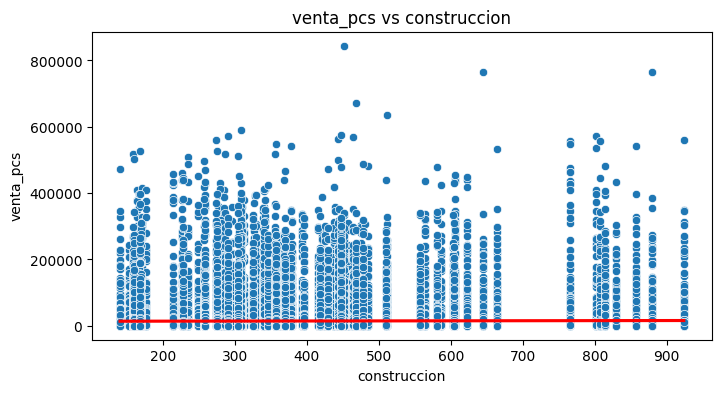

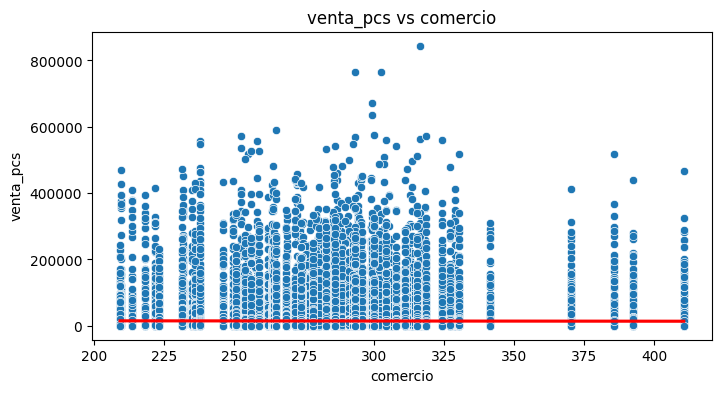

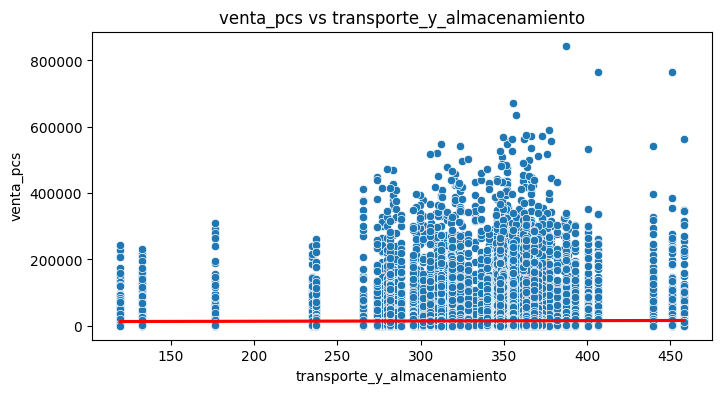

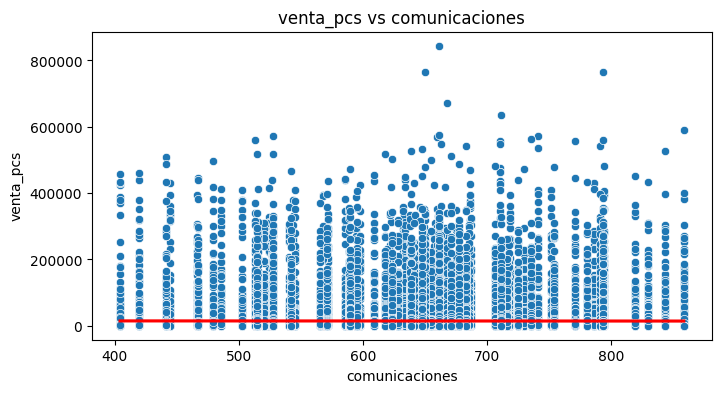

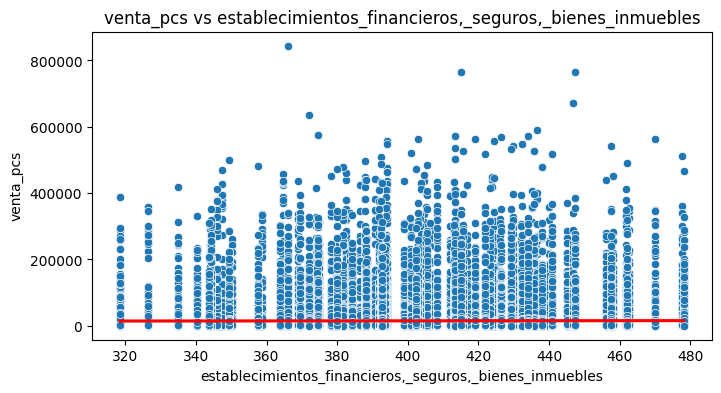

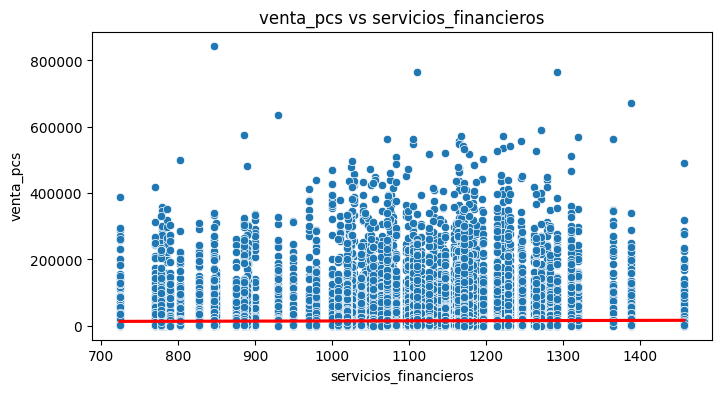

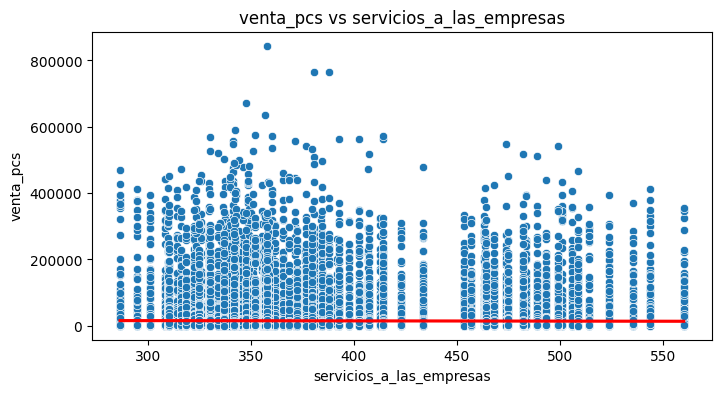

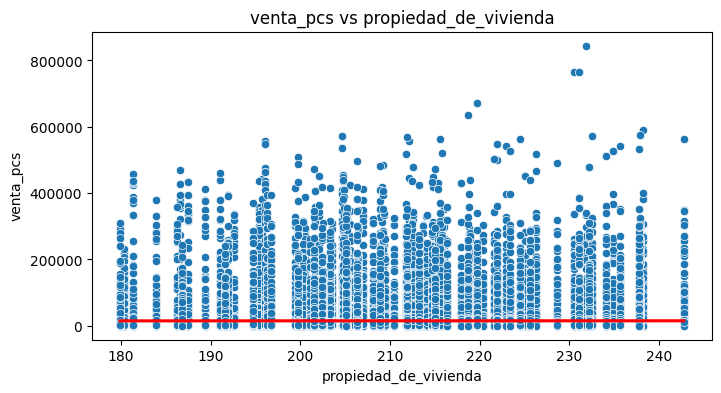

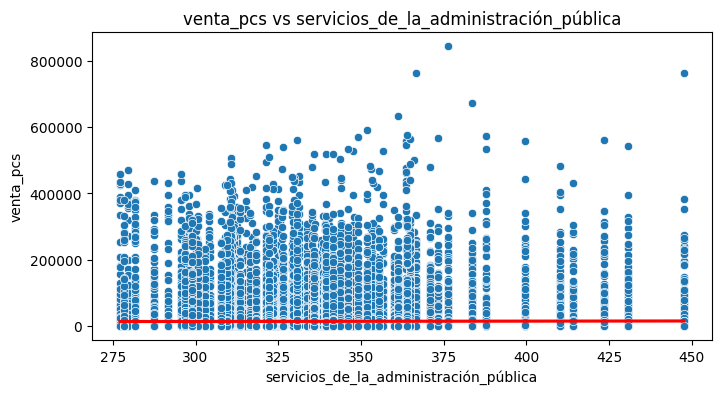

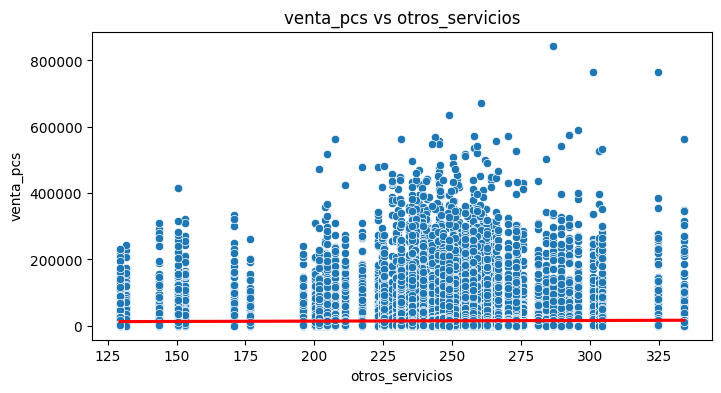

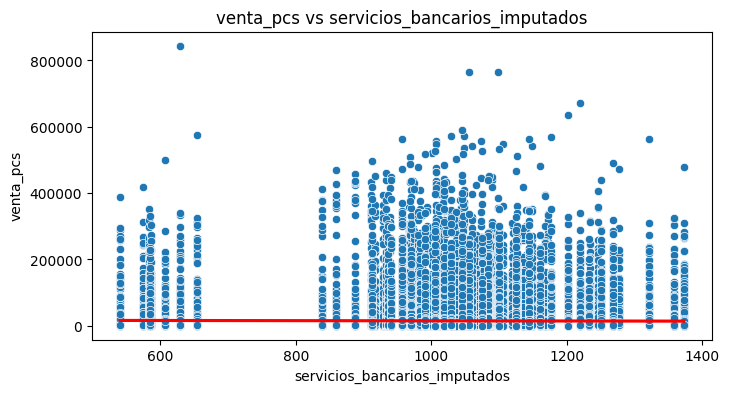

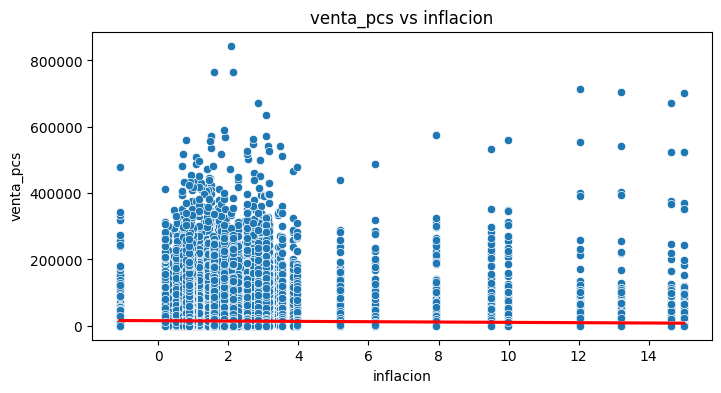

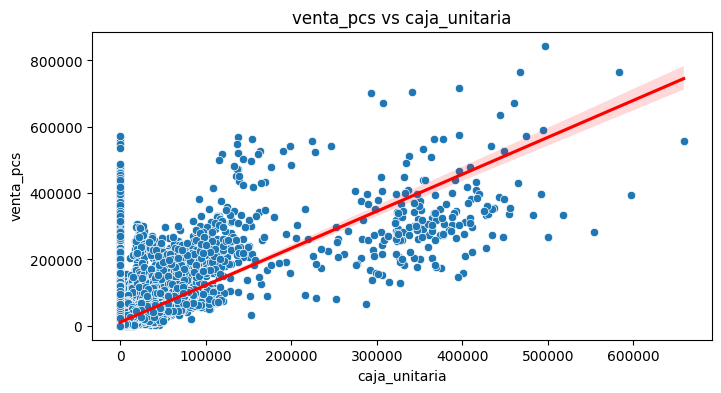

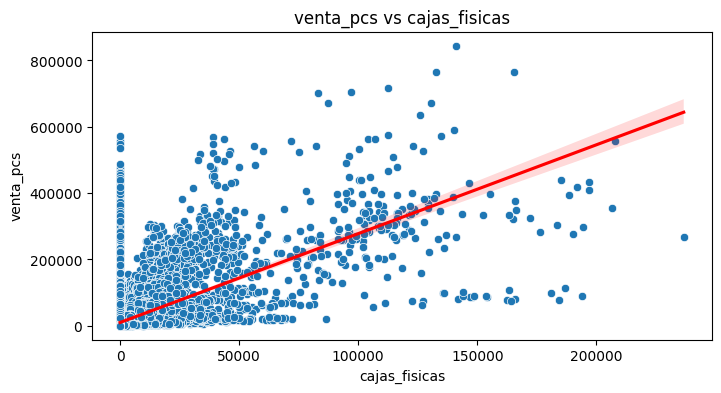

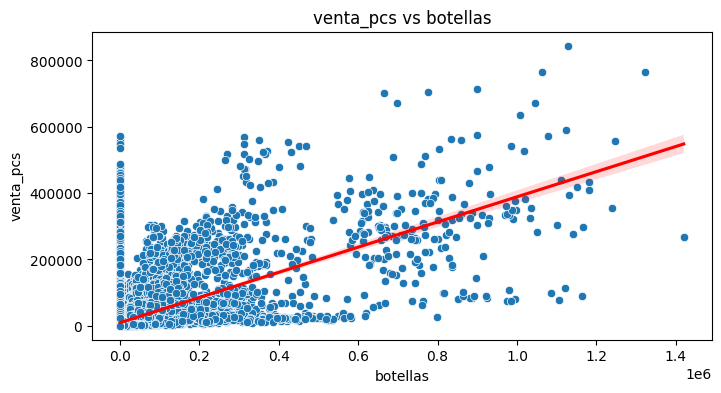

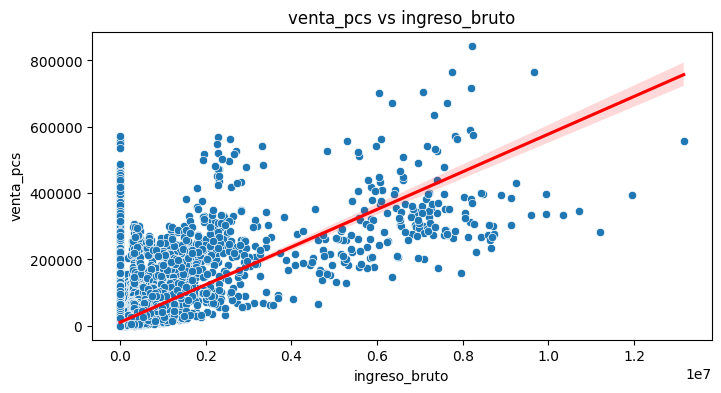

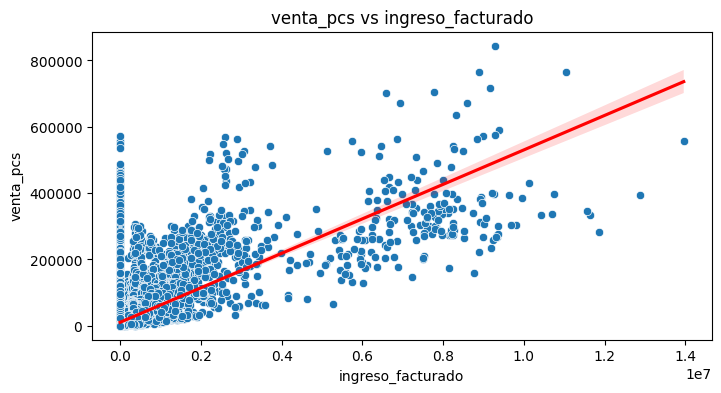

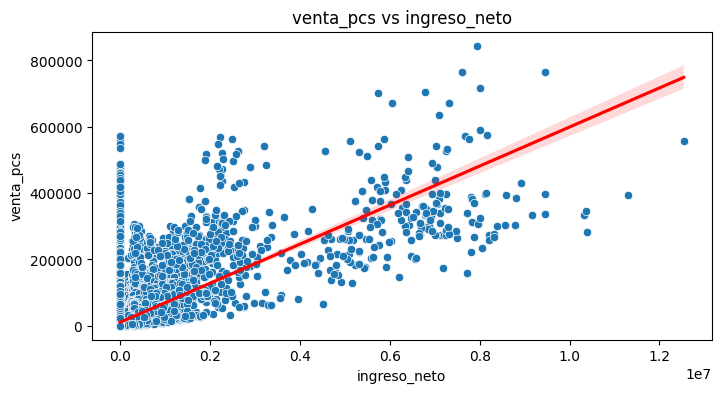

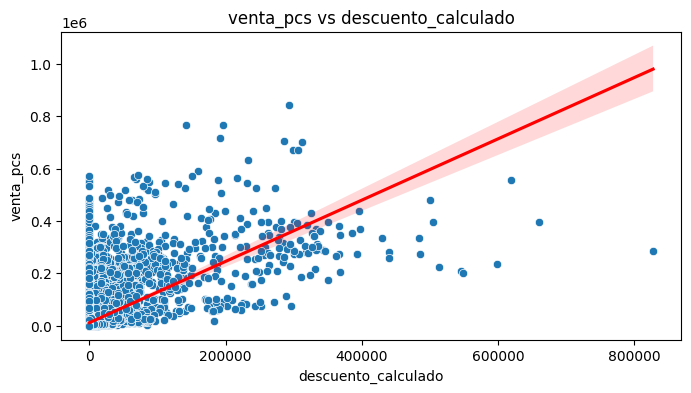

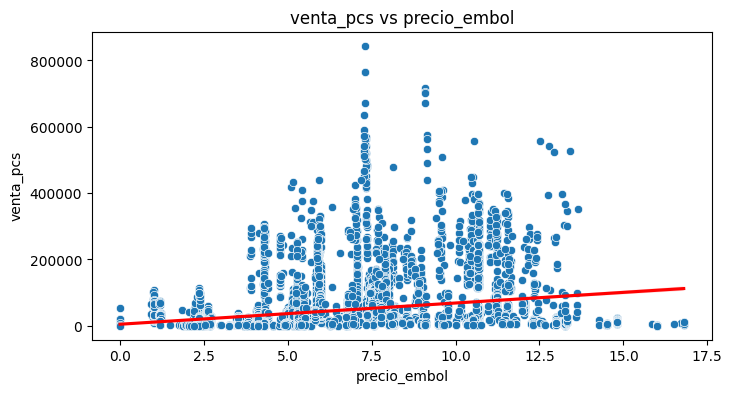

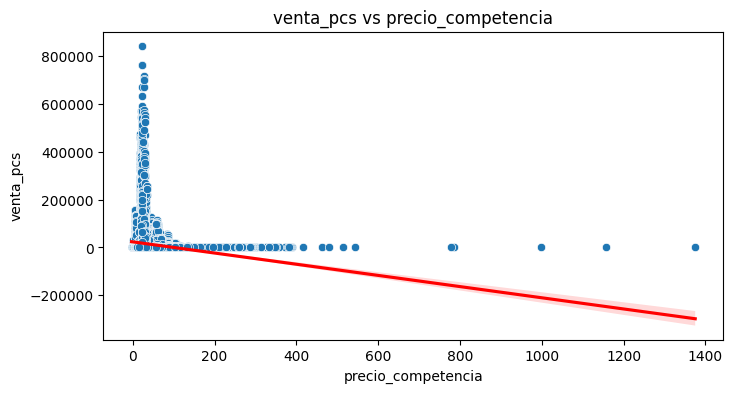

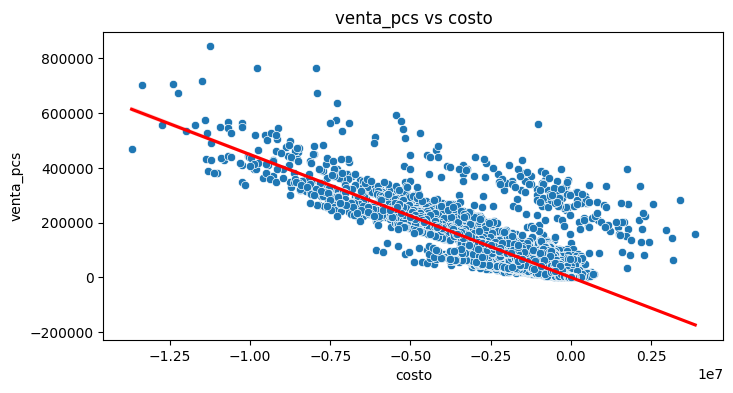

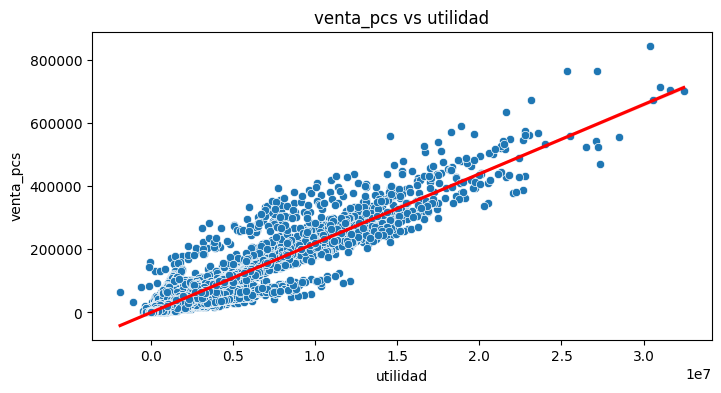

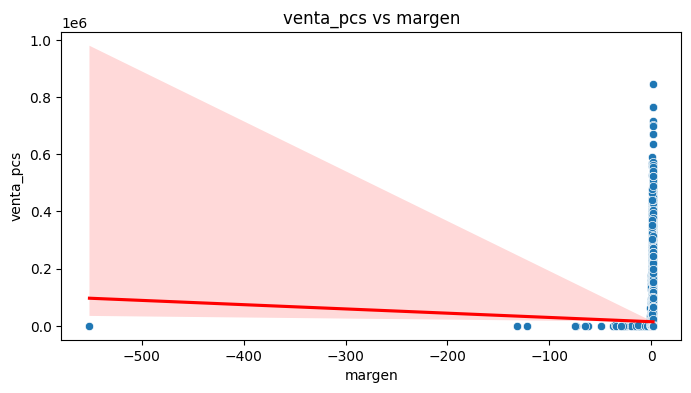

In [ ]:
# Análisis bivariado para variable objetivo en competencia
for col in numeric_cols:
    if col != target_col:
        plt.figure(figsize=(8,4))
        sns.scatterplot(x=col, y=target_col, data=df[df[target_col] > 0])
        sns.regplot(x=col, y=target_col, data=df[df[target_col] > 0], scatter=False, color="red")  # línea de tendencia
        plt.title(f"{target_col} vs {col}")
        plt.show()

# Conclusiones

-- Estructura y calidad de datos

* Se identificaron columnas numéricas almacenadas como texto (con comas y guiones) que requieren limpieza y conversión a tipos adecuados.

* Se detectaron valores faltantes en varias columnas, cuya imputación debe realizarse según la importancia de cada variable.

* Algunas variables categóricas presentan problemas de estandarización y distinta cardinalidad, lo que exige aplicar estrategias diferenciadas de codificación.

* Estas correcciones se realizaron previamente a revisar la distribución de las variables.

* Se encontraron outliers en variables numéricas (ventas, precios, ingresos) detectados con IQR y Z-score, los cuales requieren revisión caso por caso.

* Varias variables muestran distribuciones sesgadas, lo que sugiere la necesidad de aplicar transformaciones (ej. logarítmicas) antes de modelar.

* Se exploraron tendencias de ventas, ingresos y botellas a lo largo de los años, observándose patrones que sugieren estacionalidad.

* Se realizó una primera comparación entre Embol y la competencia, con histogramas y análisis bivariados de ventas, aunque de forma separada.

* Falta integrar una comparación directa de precios y ventas entre Embol y competidores para evaluar mejor el impacto en la demanda.

-- Próximos pasos

* Documentar e imputar valores faltantes de acuerdo con la relevancia de cada variable.

* Decidir y aplicar tratamientos a outliers y transformaciones por sesgo.

* Codificar variables categóricas según su cardinalidad y estandarizar sus valores.

* Profundizar en la segmentación por categoría de producto, región o canal para capturar diferencias en el comportamiento de la demanda.